In [ ]:
import pandas as pd
import numpy as np
import tejapi
import os
import matplotlib.pyplot as plt
import datetime
plt.rcParams['font.family'] = 'Arial'

os.environ['TEJAPI_BASE'] = "your base"
os.environ['TEJAPI_KEY'] = "your key"


from zipline.sources.TEJ_Api_Data import get_universe
import TejToolAPI
from zipline.data.run_ingest import simple_ingest
from zipline.api import set_slippage, set_commission, set_benchmark,  symbol,  record, order_target_percent
from zipline.finance import commission, slippage
from zipline import run_algorithm

In [ ]:
from logbook import Logger, StderrHandler, INFO
log_handler = StderrHandler(format_string='[{record.time:%Y-%m-%d %H:%M:%S.%f}]: ' +
                            '{record.level_name}: {record.func_name}: {record.message}',
                            level=INFO)
log_handler.push_application()
log = Logger('get_universe')

In [ ]:
pool = get_universe(start = '2020-01-01',
                    end = '2025-05-21',
                    mkt_bd_e = ['TSE', 'OTC', 'TIB'],  # 已上市之股票
                    stktp_e = 'Common Stock',  # 普通股
                    ) # general industry 可篩掉金融產業


[2025-06-23 00:50:19.814095]: INFO: get_universe_TW: Filters：{'mkt_bd_e': ['TSE', 'OTC', 'TIB'], 'stktp_e': 'Common Stock'}


Currently used TEJ API key call quota 2/100000 (0.0%)
Currently used TEJ API key data quota 2177718/10000000 (21.78%)


In [ ]:
columns = ['close_d', 'adjfac', 'fld005', 'qfii_pct' , 'fd_pct' , 'ri'  , 'shares','per' , 'cscfo' , 'cscfi' , 'r307' , 'r19'  , 'open_d' ]
start_dt = pd.Timestamp('2020-01-01', tz = 'UTC')
end_dt = pd.Timestamp('2025-05-21', tz = "UTC")

data = TejToolAPI.get_history_data(start = start_dt,
                                   end = end_dt,
                                   ticker = pool,
                                   columns = columns,
                                   transfer_to_chinese = True)
data

Currently used TEJ API key call quota 268/100000 (0.27%)
Currently used TEJ API key data quota 10020453/10000000 (100.2%)


,股票代碼,日期,本益比,開盤價,收盤價,調整係數,流通在外股數_千股,投信持股率,外資持股率,近12月每股營收_元,...,每股淨值_A,每股淨值_Q,每股淨值_TTM,營運產生現金流量_A,營運產生現金流量_Q,營運產生現金流量_TTM,常續性利益_A,常續性利益_Q,常續性利益_TTM,董監持股％
0,1101,2020-01-02,10.86,43.80,44.10,0.715091,5465619.0,1.06,30.22,22.30,...,33.24,33.24,33.24,17688398.0,4453202.0,25347643.0,17307802.0,6630896.0,22963941.0,14.32
1,1101,2020-01-03,10.83,44.15,43.95,0.715091,5465619.0,1.06,30.20,22.30,...,33.24,33.24,33.24,17688398.0,4453202.0,25347643.0,17307802.0,6630896.0,22963941.0,14.32
2,1101,2020-01-06,10.70,43.50,43.45,0.715091,5465619.0,1.07,30.17,22.30,...,33.24,33.24,33.24,17688398.0,4453202.0,25347643.0,17307802.0,6630896.0,22963941.0,14.32
3,1101,2020-01-07,10.74,43.45,43.60,0.715091,5465619.0,1.07,30.20,22.30,...,33.24,33.24,33.24,17688398.0,4453202.0,25347643.0,17307802.0,6630896.0,22963941.0,14.32
4,1101,2020-01-08,10.69,43.15,43.40,0.715091,5465619.0,1.07,30.17,22.30,...,33.24,33.24,33.24,17688398.0,4453202.0,25347643.0,17307802.0,6630896.0,22963941.0,14.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2176529,9962,2025-05-15,18.42,13.55,13.45,1.000000,90220.0,0.00,0.34,27.75,...,11.90,11.90,11.90,174943.0,174943.0,32829.0,11186.0,11186.0,65414.0,11.03
2176530,9962,2025-05-16,18.49,13.45,13.50,1.000000,90220.0,0.00,0.34,27.75,...,11.90,11.90,11.90,174943.0,174943.0,32829.0,11186.0,11186.0,65414.0,11.03
2176531,9962,2025-05-19,18.49,13.45,13.50,1.000000,90220.0,0.00,0.33,27.75,...,11.90,11.90,11.90,174943.0,174943.0,32829.0,11186.0,11186.0,65414.0,11.03
2176532,9962,2025-05-20,18.49,13.35,13.50,1.000000,90220.0,0.00,0.33,27.75,...,11.90,11.90,11.90,174943.0,174943.0,32829.0,11186.0,11186.0,65414.0,11.03


In [ ]:
df = data

In [ ]:
df.columns

Index(['股票代碼', '日期', '本益比', '開盤價', '收盤價', '調整係數', '流通在外股數_千股', '投信持股率',
       '外資持股率', '近12月每股營收_元', '投資產生現金流量_A', '投資產生現金流量_Q', '投資產生現金流量_TTM',
       '每股淨值_A', '每股淨值_Q', '每股淨值_TTM', '營運產生現金流量_A', '營運產生現金流量_Q',
       '營運產生現金流量_TTM', '常續性利益_A', '常續性利益_Q', '常續性利益_TTM', '董監持股％'],
      dtype='object')

In [ ]:
df['調整後股價'] = df['收盤價'] * df['調整係數']
df['日期'] = pd.to_datetime(df['日期'])
df = df.sort_values(['股票代碼', '日期'])

# 計算近 52 週（252 個交易日）的最高價
df['近52週最高價'] = (
    df.groupby('股票代碼')['調整後股價']
    .transform(lambda x: x.rolling(window=252, min_periods=1).max())
)
df['股價標準'] = df['開盤價'] < (df['近52週最高價'] * 0.5)



In [ ]:
df['近6月投信最低持股率'] = (
    df.groupby('股票代碼')['投信持股率']
    .transform(lambda x: x.rolling(window=126, min_periods=1).min())
)

df['近6月外資最低持股率'] = (
    df.groupby('股票代碼')['外資持股率']
    .transform(lambda x: x.rolling(window=126, min_periods=1).min())
)

df['近6月董監最低持股率'] = (
    df.groupby('股票代碼')['董監持股％']
    .transform(lambda x: x.rolling(window=126, min_periods=1).min())
)
# Step 1: 計算六個月內最低持股比例
df['近6月董監最低持股率'] = (
    df.groupby('股票代碼')['董監持股％']
    .transform(lambda x: x.rolling(window=126, min_periods=1).min())
)
df['近6月外資最低持股率'] = (
    df.groupby('股票代碼')['外資持股率']
    .transform(lambda x: x.rolling(window=126, min_periods=1).min())
)
df['近6月投信最低持股率'] = (
    df.groupby('股票代碼')['投信持股率']
    .transform(lambda x: x.rolling(window=126, min_periods=1).min())
)

# Step 2: 各項比例變動（最新 - 最低 or 倍數）
df['董監增減比'] = df['董監持股％'] - df['近6月董監最低持股率']
df['外資倍數'] = df['外資持股率'] / df['近6月外資最低持股率']
df['投信倍數'] = df['投信持股率'] / df['近6月投信最低持股率']

# Step 3: 標準判斷欄位（T/F）
df['董監標準'] = df['董監增減比'] > 1
df['外資標準'] = df['外資倍數'] > 2
df['投信標準'] = df['投信倍數'] > 2

In [ ]:
df['每股自由現金流量'] = (df['投資產生現金流量_TTM'] + df['營運產生現金流量_TTM']) / df['流通在外股數_千股']
# 本益比條件：小於 12
df['本益比條件'] = df['本益比'] < 12

# P/FCF 條件：價格 / 每股自由現金流量 < 10
df['PFCF條件'] = (df['開盤價'] / df['每股自由現金流量']) < 10

# PBR 條件：價格 / 每股淨值 < 1
df['PBR條件'] = (df['開盤價'] / df['每股淨值_Q']) < 1

# PSR 條件：價格 / 每股營收 < 1
df['PSR條件'] = (df['開盤價'] / df['近12月每股營收_元']) < 1


In [ ]:
df['基本面符合數'] = (
    (df['本益比條件'] == True).astype(int) +
    (df['PFCF條件'] == True).astype(int) +
    (df['PBR條件'] == True).astype(int) +
    (df['PSR條件'] == True).astype(int)
)

In [ ]:
df

,股票代碼,日期,本益比,開盤價,收盤價,調整係數,流通在外股數_千股,投信持股率,外資持股率,近12月每股營收_元,...,投信倍數,董監標準,外資標準,投信標準,每股自由現金流量,本益比條件,PFCF條件,PBR條件,PSR條件,基本面符合數
0,1101,2020-01-02,10.86,43.80,44.10,0.715091,5465619.0,1.06,30.22,22.30,...,1.000000,False,False,False,-3.272075,True,True,False,False,2
1,1101,2020-01-03,10.83,44.15,43.95,0.715091,5465619.0,1.06,30.20,22.30,...,1.000000,False,False,False,-3.272075,True,True,False,False,2
2,1101,2020-01-06,10.70,43.50,43.45,0.715091,5465619.0,1.07,30.17,22.30,...,1.009434,False,False,False,-3.272075,True,True,False,False,2
3,1101,2020-01-07,10.74,43.45,43.60,0.715091,5465619.0,1.07,30.20,22.30,...,1.009434,False,False,False,-3.272075,True,True,False,False,2
4,1101,2020-01-08,10.69,43.15,43.40,0.715091,5465619.0,1.07,30.17,22.30,...,1.009434,False,False,False,-3.272075,True,True,False,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2176529,9962,2025-05-15,18.42,13.55,13.45,1.000000,90220.0,0.00,0.34,27.75,...,NaN,False,False,False,-0.581312,False,True,False,True,2
2176530,9962,2025-05-16,18.49,13.45,13.50,1.000000,90220.0,0.00,0.34,27.75,...,NaN,False,False,False,-0.581312,False,True,False,True,2
2176531,9962,2025-05-19,18.49,13.45,13.50,1.000000,90220.0,0.00,0.33,27.75,...,NaN,False,False,False,-0.581312,False,True,False,True,2
2176532,9962,2025-05-20,18.49,13.35,13.50,1.000000,90220.0,0.00,0.33,27.75,...,NaN,False,False,False,-0.581312,False,True,False,True,2


In [ ]:
# 設定索引為 (`日期`, `股票代碼`)
df_filtered = df.set_index(['日期', '股票代碼']).sort_index()
df_filtered


本益比     開盤價     收盤價      調整係數  流通在外股數_千股  投信持股率  外資持股率  \
日期         股票代碼                                                              
2020-01-02 1101   10.86   43.80   44.10  0.715091  5465619.0   1.06  30.22   
           1102   10.77   48.10   48.90  0.728226  3361447.0   1.37  28.95   
           1103   11.06   22.40   22.35  0.801128   774781.0   0.00   4.39   
           1104   12.84   19.60   19.65  0.739313   653609.0   0.00  12.95   
           1108     NaN    8.38    8.37  0.789032   404738.0   0.00   1.63   
...                 ...     ...     ...       ...        ...    ...    ...   
2025-05-21 9951   12.22   57.00   57.90  1.000000    74900.0   0.00   4.92   
           9955  157.00   29.85   29.50  1.000000   104514.0   0.00   0.65   
           9958   31.33  182.50  179.50  1.000000   256897.0   2.21  10.60   
           9960   13.20   25.35   25.35  1.000000    33593.0   0.00   8.86   
           9962   18.56   13.50   13.55  1.000000    90220.0   0.00   0.33   

                 近12月每股營收_元  投資產生現金流量_A  投資產生現金流量_Q  ...     投信倍數   董監標準  \
日期         股票代碼                                      ...                   
2020-01-02 1101       22.30 -10775360.0  -1760113.0  ...  1.00000  False   
           1102       26.11 -15573051.0  -1682883.0  ...  1.00000  False   
           1103        2.53     -2689.0   1062114.0  ...      NaN  False   
           1104        7.67   -273704.0    -62068.0  ...      NaN  False   
           1108        9.03    143018.0     18186.0  ...      NaN  False   
...                     ...         ...         ...  ...      ...    ...   
2025-05-21 9951       77.65     91221.0     91221.0  ...      NaN  False   
           9955       11.07    -15434.0    -15434.0  ...      NaN  False   
           9958       52.78    -89750.0    -89750.0  ...  2.87013  False   
           9960       21.68     60800.0     60800.0  ...      NaN  False   
           9962       27.75    -11293.0    -11293.0  ...      NaN  False   

                  外資標準   投信標準  每股自由現金流量  本益比條件  PFCF條件  PBR條件  PSR條件  基本面符合數  
日期         股票代碼                                                               
2020-01-02 1101  False  False -3.272075   True    True  False  False       2  
           1102  False  False  3.658551   True   False  False  False       1  
           1103  False  False -0.495407   True    True   True  False       3  
           1104  False  False  0.381910  False   False   True  False       1  
           1108  False  False -0.618062  False    True   True   True       3  
...                ...    ...       ...    ...     ...    ...    ...     ...  
2025-05-21 9951  False  False  3.713418  False   False  False   True       1  
           9955  False  False  0.376524  False   False  False  False       0  
           9958  False   True  2.188379  False   False  False  False       0  
           9960  False  False  3.590837  False    True  False  False       1  
           9962  False  False -0.581312  False    True  False   True       2  

[2176534 rows x 39 columns]

In [ ]:
tickers = ' '.join(pool+['IR0001'])
start = '2020-01-01'
end = '2025-05-21'

os.environ['mdate'] = start+' '+end
os.environ['ticker'] = tickers
!zipline ingest -b tquant

Merging daily equity files:
Currently used TEJ API key call quota 274/100000 (0.27%)
Currently used TEJ API key data quota 14398415/10000000 (143.98%)


[2025-06-23 00:55:58.914558] INFO: zipline.data.bundles.core: Ingesting tquant.
[2025-06-23 01:00:24.083488] INFO: zipline.data.bundles.core: Ingest tquant successfully.


In [ ]:
from zipline.data import bundles

# 讀取 Zipline bundle
bundle_name = 'tquant'
bundle = bundles.load(bundle_name)

# 取得 Zipline 的 SID
sids = bundle.asset_finder.equities_sids
assets = bundle.asset_finder.retrieve_all(sids)

# 建立 股票代碼 → SID 的對應表
symbol_mapping_sid = {i.symbol: i.sid for i in assets}

# 將 股票代碼 轉換為 SID
df_filtered = df_filtered.reset_index()
df_filtered['SID'] = df_filtered['股票代碼'].map(symbol_mapping_sid)

# 刪除無法對應的股票
df_filtered5 = df_filtered.dropna(subset=['SID']).copy()
df_filtered['SID'] = df_filtered['SID'].astype(int)

# 重新設索引 (`日期`, `SID`)
data_run = df_filtered.set_index(['日期', 'SID']).sort_index()

data_run

股票代碼     本益比     開盤價     收盤價      調整係數  流通在外股數_千股  投信持股率  \
日期         SID                                                              
2020-01-02 0     1101   10.86   43.80   44.10  0.715091  5465619.0   1.06   
           1     1102   10.77   48.10   48.90  0.728226  3361447.0   1.37   
           2     1103   11.06   22.40   22.35  0.801128   774781.0   0.00   
           3     1104   12.84   19.60   19.65  0.739313   653609.0   0.00   
           4     1108     NaN    8.38    8.37  0.789032   404738.0   0.00   
...               ...     ...     ...     ...       ...        ...    ...   
2025-05-21 1816  9951   12.22   57.00   57.90  1.000000    74900.0   0.00   
           1817  9955  157.00   29.85   29.50  1.000000   104514.0   0.00   
           1818  9958   31.33  182.50  179.50  1.000000   256897.0   2.21   
           1819  9960   13.20   25.35   25.35  1.000000    33593.0   0.00   
           1820  9962   18.56   13.50   13.55  1.000000    90220.0   0.00   

                 外資持股率  近12月每股營收_元  投資產生現金流量_A  ...     投信倍數   董監標準   外資標準  \
日期         SID                                  ...                          
2020-01-02 0     30.22       22.30 -10775360.0  ...  1.00000  False  False   
           1     28.95       26.11 -15573051.0  ...  1.00000  False  False   
           2      4.39        2.53     -2689.0  ...      NaN  False  False   
           3     12.95        7.67   -273704.0  ...      NaN  False  False   
           4      1.63        9.03    143018.0  ...      NaN  False  False   
...                ...         ...         ...  ...      ...    ...    ...   
2025-05-21 1816   4.92       77.65     91221.0  ...      NaN  False  False   
           1817   0.65       11.07    -15434.0  ...      NaN  False  False   
           1818  10.60       52.78    -89750.0  ...  2.87013  False  False   
           1819   8.86       21.68     60800.0  ...      NaN  False  False   
           1820   0.33       27.75    -11293.0  ...      NaN  False  False   

                  投信標準  每股自由現金流量  本益比條件  PFCF條件  PBR條件  PSR條件  基本面符合數  
日期         SID                                                         
2020-01-02 0     False -3.272075   True    True  False  False       2  
           1     False  3.658551   True   False  False  False       1  
           2     False -0.495407   True    True   True  False       3  
           3     False  0.381910  False   False   True  False       1  
           4     False -0.618062  False    True   True   True       3  
...                ...       ...    ...     ...    ...    ...     ...  
2025-05-21 1816  False  3.713418  False   False  False   True       1  
           1817  False  0.376524  False   False  False  False       0  
           1818   True  2.188379  False   False  False  False       0  
           1819  False  3.590837  False    True  False  False       1  
           1820  False -0.581312  False    True  False   True       2  

[2176534 rows x 40 columns]

In [ ]:
# 你原本有 '基本面符合數' 是整數
data_run = data_run.copy()

# 新增一欄表示基本面是否符合條件 (bool)
data_run['基本面符合條件'] = data_run['基本面符合數'] >= 4


In [ ]:
data_run['基本面符合條件']

日期          SID 
2020-01-02  0       False
            1       False
            2       False
            3       False
            4       False
                    ...  
2025-05-21  1816    False
            1817    False
            1818    False
            1819    False
            1820    False
Name: 基本面符合條件, Length: 2176534, dtype: bool

In [ ]:
from zipline.pipeline import Pipeline
from zipline.pipeline.data import Column, DataSet
from zipline.pipeline.loaders.frame import DataFrameLoader
from zipline.pipeline.domain import TW_EQUITIES
from zipline.pipeline.engine import SimplePipelineEngine
import pandas as pd
from zipline.pipeline.data import EquityPricing

# 1. 假設你已有 data_run，是 MultiIndex DataFrame (日期, SID)，
# 包含以下欄位 (字串 'T' 表示符合條件，整數表示數值)
# '股價標準', '董監標準', '外資標準', '投信標準', '基本面符合數'

# 2. 轉成寬格式，index為日期，欄位為股票代碼(SID)

def prepare_bool_df(df, col):
    return (df[col] == 'T').unstack()

price_df = prepare_bool_df(data_run, '股價標準')
insider_df = prepare_bool_df(data_run, '董監標準')
foreign_df = prepare_bool_df(data_run, '外資標準')
trust_df = prepare_bool_df(data_run, '投信標準')
basic_num_df = data_run['基本面符合數'].unstack()
basic_bool_df = data_run['基本面符合條件'].unstack()
# 3. 確保時間索引是帶有 UTC 時區（Zipline Pipeline要求）
def localize_utc(df):
    if df.index.tz is None:
        return df.tz_localize('UTC')
    else:
        return df.tz_convert('UTC')

price_df = localize_utc(price_df)
insider_df = localize_utc(insider_df)
foreign_df = localize_utc(foreign_df)
trust_df = localize_utc(trust_df)
basic_num_df = localize_utc(basic_num_df)
basic_bool_df = localize_utc(basic_bool_df)

# 4. 自訂 Dataset
class CustomFactors(DataSet):
    Price_cond = Column(dtype='bool', missing_value=False)
    Insider_cond = Column(dtype='bool', missing_value=False)
    Foreign_cond = Column(dtype='bool', missing_value=False)
    Trust_cond = Column(dtype='bool', missing_value=False)
    #BasicNum_cond = Column(dtype='int64', missing_value=0)
    BasicNum_cond = Column(dtype='bool', missing_value=False)
    domain = TW_EQUITIES

# 5. 建立 Loader
loader_dict = {
    CustomFactors.Price_cond: DataFrameLoader(CustomFactors.Price_cond, price_df),
    CustomFactors.Insider_cond: DataFrameLoader(CustomFactors.Insider_cond, insider_df),
    CustomFactors.Foreign_cond: DataFrameLoader(CustomFactors.Foreign_cond, foreign_df),
    CustomFactors.Trust_cond: DataFrameLoader(CustomFactors.Trust_cond, trust_df),
    #CustomFactors.BasicNum_cond: DataFrameLoader(CustomFactors.BasicNum_cond, basic_num_df),
    CustomFactors.BasicNum_cond: DataFrameLoader(CustomFactors.BasicNum_cond, basic_bool_df)
}

# 6. 你要自行定義 pricing_loader (這裡示意 None)
pricing_loader = None

def choose_loader(column):
    if column.name in EquityPricing._column_names:
        return pricing_loader
    elif column.name in CustomFactors._column_names:
        return loader_dict[column]
    else:
        raise Exception(f"Column {column.name} not available")

# 7. 建立 Pipeline Engine
engine = SimplePipelineEngine(
    get_loader=choose_loader,
    asset_finder=bundle.asset_finder,
    default_domain=TW_EQUITIES
)

# 8. 定義條件邏輯
def compute_signals():
    price = CustomFactors.Price_cond.latest
    insider = CustomFactors.Insider_cond.latest
    foreign = CustomFactors.Foreign_cond.latest
    trust = CustomFactors.Trust_cond.latest
    #basic_num = CustomFactors.BasicNum_cond.latest

    chip_condition = insider | foreign | trust
    basic_condition = CustomFactors.BasicNum_cond.latest

    # 最終條件：股價標準 AND (三籌碼任一成立) OR (前面不成立且基本面符合數>=2)

    final_signal = (price & chip_condition) |   (basic_condition)

    return Pipeline(columns={'signals': final_signal})

# 9. 設定時間區間
start_dt = pd.Timestamp('2020-01-01', tz='UTC')
end_dt = pd.Timestamp('2025-05-21', tz='UTC')

# 10. 執行 Pipeline
pipeline_result = engine.run_pipeline(compute_signals(), start_dt, end_dt)

# 11. 印出結果
pipeline_result







signals
2020-01-03 00:00:00+00:00 Equity(0 [1101])         False
                          Equity(1 [1102])         False
                          Equity(2 [1103])         False
                          Equity(3 [1104])         False
                          Equity(4 [1108])         False
...                                                  ...
2025-05-21 00:00:00+00:00 Equity(1817 [9955])      False
                          Equity(1818 [9958])      False
                          Equity(1819 [9960])      False
                          Equity(1820 [9962])      False
                          Equity(1821 [IR0001])    False

[2176298 rows x 1 columns]

In [ ]:
len(pipeline_result[pipeline_result['signals'] == True])  # 符合條件的股票數量


44812

In [ ]:
def analyze(context, perf):

    fig = plt.figure(figsize=(16, 12))

    # First chart(累計報酬)
    ax = fig.add_subplot(311)
    ax.set_title('Strategy Results')
    ax.plot(perf['algorithm_period_return'], linestyle='-',
                label='algorithm period return', linewidth=3.0)
    ax.plot(perf['benchmark_period_return'], linestyle='-',
                label='benchmark period return', linewidth=3.0)
    ax.legend()
    ax.grid(False)

    # Second chart(ending_cash)->觀察是否超買
    ax = fig.add_subplot(312)
    ax.plot(perf['ending_cash'],
            label='ending_cash', linestyle='-', linewidth=1.0)
    ax.axhline(y=1,c='r',linewidth=0.3)
    ax.legend()
    ax.grid(True)

In [ ]:
from zipline.api import (
    order_target_percent,order,
    pipeline_output,
    get_datetime,
    schedule_function,
    date_rules,
    time_rules,
    symbol,
)
from zipline.utils.calendar_utils import get_calendar
from zipline.api import set_slippage, set_commission, set_benchmark, attach_pipeline, slippage, commission
import pandas as pd

# ────────────── 主要函數 ──────────────

def initialize(context):
    """初始化環境設置，包含交易參數與排程。"""
    context.holdings = {}  # 用來存儲每檔股票的持倉資訊
    context.rebalance_period = 63    # 重新平衡天數
    context.stop_loss_pct = 0.1     # 停損百分比
    context.take_profit_pct = 0.2  # 停利百分比

    # 風控、手續費、Benchmark、Pipeline設定
    set_slippage(slippage.TW_Slippage(volume_limit=1.0))
    set_commission(commission.Custom_TW_Commission())
    set_benchmark(symbol('IR0001'))

    # 把 compute_signals pipeline attach 進來
    attach_pipeline(compute_signals(), 'mystrats')

    # 每日開盤後 5 分鐘執行 handle_data
    schedule_function(handle_data, date_rules.every_day(), time_rules.market_open(minutes=5))

def handle_data(context, data):
    """根據當日信號執行下單操作，使用可用現金進行買入。"""
    out = pipeline_output('mystrats')
    if out.empty:
        return

    signals = out['signals']
    for asset, signal in signals.items():
        if signal and asset not in context.holdings:  # 若信號為 True 且未持有資產
            cash = context.portfolio.cash  # 獲取可用現金
            if cash > 0:
                price = data.history(asset, 'open', 2, '1d').iloc[1]  # 取得昨日開盤價
                if pd.isna(price) or price <= 0:  # 檢查價格是否有效
                    continue  # 若價格無效，跳過該資產
                order_value = cash * 0.1  # 使用可用現金的 10% 進行下單
                shares = int(order_value // price)  # 計算可買的股數
                if shares > 0:
                    order(asset, shares)  # 下單
                    context.holdings[asset] = {
                        'entry_dt': get_datetime(),
                        'entry_price': price,
                    }
                    print(f"Buy {asset} x{shares} @ {price:.2f} on {get_datetime().date()} (10% cash)")

        elif signal and asset in context.holdings:
            # 續抱：重置 entry_dt（表示續抱）
            context.holdings[asset]['entry_dt'] = get_datetime()

        elif asset in context.holdings:
            # 再平衡：檢查是否需要平倉
            rebalance(context, data, asset)

def rebalance(context, data, asset):
    """檢查並平倉，包含停損、停利或達到持倉期。"""
    info = context.holdings[asset]
    price = data.current(asset, 'close')
    entry_price = info['entry_price']

    # 停損條件
    if price <= entry_price * (1 - context.stop_loss_pct):
        order_target_percent(asset, 0)  # 停損，賣出資產
        context.holdings.pop(asset, None)  # 移除持倉
        print(f"Sell {asset} for stop loss @ {price:.2f} on {get_datetime().date()}")
    # 停利條件
    elif price >= entry_price * (1 + context.take_profit_pct):
        order_target_percent(asset, 0)  # 停利，賣出資產
        context.holdings.pop(asset, None)  # 移除持倉
        print(f"Sell {asset} for take profit @ {price:.2f} on {get_datetime().date()}")
    # 超過持倉期則平倉
    elif days_held(context, info['entry_dt']) >= context.rebalance_period:
        order_target_percent(asset, 0)  # 超過持倉期，平倉
        context.holdings.pop(asset, None)  # 移除持倉
        print(f"Sell {asset} for rebalance @ {price:.2f} on {get_datetime().date()}")

def days_held(context, entry_dt):
    """計算持倉天數，用於再平衡判斷。"""
    cal = get_calendar('TEJ')
    today = get_datetime().normalize()
    sessions = cal.sessions_in_range(entry_dt.normalize(), today)
    return len(sessions) - 1  # entry 當天不算



Buy Equity(5 [1109]) x5000 @ 20.00 on 2021-01-04 (10% cash)
Buy Equity(55 [1409]) x6968 @ 14.35 on 2021-01-04 (10% cash)
Buy Equity(96 [1471]) x16666 @ 6.00 on 2021-01-04 (10% cash)
Buy Equity(153 [1605]) x5154 @ 19.40 on 2021-01-04 (10% cash)
Buy Equity(172 [1714]) x9433 @ 10.60 on 2021-01-04 (10% cash)
Buy Equity(174 [1718]) x8888 @ 11.25 on 2021-01-04 (10% cash)
Buy Equity(273 [2204]) x1960 @ 51.00 on 2021-01-04 (10% cash)
Buy Equity(359 [2409]) x7117 @ 14.05 on 2021-01-04 (10% cash)
Buy Equity(517 [2823]) x4504 @ 22.20 on 2021-01-04 (10% cash)
Buy Equity(529 [2867]) x11587 @ 8.63 on 2021-01-04 (10% cash)
Buy Equity(531 [2881]) x2166 @ 46.15 on 2021-01-04 (10% cash)
Buy Equity(532 [2882]) x2369 @ 42.20 on 2021-01-04 (10% cash)
Buy Equity(538 [2888]) x11350 @ 8.81 on 2021-01-04 (10% cash)
Buy Equity(759 [3481]) x7067 @ 14.15 on 2021-01-04 (10% cash)
Buy Equity(865 [3706]) x3384 @ 29.55 on 2021-01-04 (10% cash)
Buy Equity(920 [4207]) x8403 @ 11.90 on 2021-01-04 (10% cash)
Buy Equity(9

[2025-06-23 01:06:34.050016]: INFO: earn_dividends: Equity(865 [3706]), cash_dividend amount: 1.0, pay_date: 2021-04-29, div_owed: 3384.0


Sell Equity(273 [2204]) for take profit @ 65.10 on 2021-03-25
Sell Equity(96 [1471]) for take profit @ 7.30 on 2021-03-31
Sell Equity(174 [1718]) for stop loss @ 9.88 on 2021-03-31
Sell Equity(5 [1109]) for take profit @ 24.00 on 2021-04-08
Sell Equity(55 [1409]) for take profit @ 19.25 on 2021-04-13
Sell Equity(532 [2882]) for take profit @ 51.60 on 2021-04-19
Sell Equity(920 [4207]) for take profit @ 14.50 on 2021-04-21
Sell Equity(529 [2867]) for take profit @ 10.40 on 2021-04-22
Sell Equity(1673 [8105]) for take profit @ 17.10 on 2021-04-22
Buy Equity(348 [2392]) x467 @ 46.15 on 2021-04-23 (10% cash)
Buy Equity(436 [2514]) x1129 @ 19.10 on 2021-04-23 (10% cash)
Buy Equity(525 [2850]) x527 @ 40.90 on 2021-04-23 (10% cash)
Buy Equity(1168 [5516]) x1378 @ 15.65 on 2021-04-23 (10% cash)
Sell Equity(153 [1605]) for take profit @ 24.85 on 2021-04-26
Sell Equity(517 [2823]) for take profit @ 26.65 on 2021-04-26
Buy Equity(527 [2852]) x2847 @ 13.80 on 2021-04-29 (10% cash)
Buy Equity(421 [

[2025-06-23 01:06:37.472744]: INFO: earn_dividends: Equity(375 [2430]), cash_dividend amount: 1.55, pay_date: 2021-05-28, div_owed: 1154.75


Sell Equity(608 [3052]) for stop loss @ 11.60 on 2021-05-14
Buy Equity(99 [1474]) x28 @ 13.20 on 2021-05-17 (10% cash)
Buy Equity(272 [2201]) x10 @ 36.50 on 2021-05-17 (10% cash)
Buy Equity(297 [2316]) x14 @ 25.50 on 2021-05-17 (10% cash)
Buy Equity(301 [2324]) x17 @ 21.85 on 2021-05-17 (10% cash)
Buy Equity(349 [2393]) x9 @ 39.00 on 2021-05-17 (10% cash)
Buy Equity(359 [2409]) x19 @ 19.80 on 2021-05-17 (10% cash)
Buy Equity(376 [2431]) x34 @ 11.20 on 2021-05-17 (10% cash)
Buy Equity(472 [2616]) x11 @ 33.00 on 2021-05-17 (10% cash)
Buy Equity(529 [2867]) x44 @ 8.55 on 2021-05-17 (10% cash)
Buy Equity(532 [2882]) x7 @ 49.10 on 2021-05-17 (10% cash)
Buy Equity(545 [2903]) x18 @ 21.10 on 2021-05-17 (10% cash)
Buy Equity(547 [2905]) x19 @ 19.95 on 2021-05-17 (10% cash)
Buy Equity(731 [3379]) x32 @ 11.90 on 2021-05-17 (10% cash)
Buy Equity(759 [3481]) x19 @ 19.10 on 2021-05-17 (10% cash)
Buy Equity(862 [3703]) x16 @ 23.05 on 2021-05-17 (10% cash)
Buy Equity(924 [4306]) x23 @ 16.10 on 2021-0

[2025-06-23 01:06:41.417374]: INFO: earn_dividends: Equity(1178 [5533]), cash_dividend amount: 0.6, pay_date: 2021-07-09, div_owed: 14.399999999999999


Buy Equity(759 [3481]) x1032 @ 22.30 on 2021-06-10 (10% cash)
Buy Equity(376 [2431]) x1503 @ 13.85 on 2021-06-15 (10% cash)
Sell Equity(1699 [8249]) for take profit @ 28.45 on 2021-06-23
Sell Equity(153 [1605]) for take profit @ 29.25 on 2021-06-29


[2025-06-23 01:06:43.041004]: INFO: earn_dividends: Equity(862 [3703]), cash_dividend amount: 1.4, pay_date: 2021-07-30, div_owed: 22.4
[2025-06-23 01:06:43.319779]: INFO: handle_split: after split: asset: Equity(529 [2867]), amount: 44, cost_basis: 9.43, last_sale_price: 9.28


Sell Equity(924 [4306]) for take profit @ 19.90 on 2021-07-01


[2025-06-23 01:06:43.320728]: INFO: handle_split: returning cash: 2.25


Sell Equity(297 [2316]) for take profit @ 30.60 on 2021-07-05
Sell Equity(593 [3036]) for take profit @ 59.40 on 2021-07-06
Sell Equity(731 [3379]) for take profit @ 14.35 on 2021-07-06


[2025-06-23 01:06:43.655955]: INFO: earn_dividends: Equity(1123 [5356]), cash_dividend amount: 2.2, pay_date: 2021-07-28, div_owed: 1850.2
[2025-06-23 01:06:43.809350]: INFO: earn_dividends: Equity(1164 [5511]), cash_dividend amount: 2.0, pay_date: 2021-07-30, div_owed: 6462.0


Buy Equity(153 [1605]) x949 @ 27.40 on 2021-07-07 (10% cash)
Sell Equity(1283 [6191]) for take profit @ 39.35 on 2021-07-13
Sell Equity(532 [2882]) for take profit @ 59.80 on 2021-07-16
Sell Equity(533 [2883]) for take profit @ 14.70 on 2021-07-16
Sell Equity(1169 [5519]) for take profit @ 23.35 on 2021-07-19


[2025-06-23 01:06:44.724477]: INFO: earn_dividends: Equity(348 [2392]), cash_dividend amount: 2.5, pay_date: 2021-08-20, div_owed: 1167.5
[2025-06-23 01:06:45.013506]: INFO: earn_dividends: Equity(472 [2616]), cash_dividend amount: 2.2, pay_date: 2021-08-24, div_owed: 24.200000000000003


Sell Equity(138 [1569]) for take profit @ 31.05 on 2021-07-22
Buy Equity(359 [2409]) x1455 @ 19.60 on 2021-07-22 (10% cash)


[2025-06-23 01:06:45.337523]: INFO: earn_dividends: Equity(759 [3481]), cash_dividend amount: 0.39883800999999997, pay_date: 2021-08-24, div_owed: 411.60082631999995
[2025-06-23 01:06:45.465799]: INFO: earn_dividends: Equity(525 [2850]), cash_dividend amount: 1.95, pay_date: 2021-08-17, div_owed: 1027.6499999999999
[2025-06-23 01:06:45.465799]: INFO: earn_dividends: Equity(545 [2903]), cash_dividend amount: 1.1, pay_date: 2021-08-24, div_owed: 19.8
[2025-06-23 01:06:45.562935]: INFO: earn_dividends: Equity(538 [2888]), cash_dividend amount: 0.40014149, pay_date: 2021-08-17, div_owed: 4541.6059115
[2025-06-23 01:06:45.564935]: INFO: handle_split: after split: asset: Equity(538 [2888]), amount: 11436, cost_basis: 8.72, last_sale_price: 9.67
[2025-06-23 01:06:45.565730]: INFO: handle_split: returning cash: 3.9


Buy Equity(924 [4306]) x1602 @ 17.85 on 2021-07-27 (10% cash)


[2025-06-23 01:06:45.749705]: INFO: earn_dividends: Equity(153 [1605]), cash_dividend amount: 0.9, pay_date: 2021-08-25, div_owed: 854.1
[2025-06-23 01:06:45.840729]: INFO: earn_dividends: Equity(272 [2201]), cash_dividend amount: 1.0, pay_date: 2021-09-07, div_owed: 10.0
[2025-06-23 01:06:45.840729]: INFO: earn_dividends: Equity(1033 [4933]), cash_dividend amount: 2.1875012, pay_date: 2021-08-24, div_owed: 960.3130267999999
[2025-06-23 01:06:45.924021]: INFO: earn_dividends: Equity(1022 [4906]), cash_dividend amount: 1.9556799999999999, pay_date: 2021-08-25, div_owed: 1631.03712
[2025-06-23 01:06:46.073604]: INFO: earn_dividends: Equity(176 [1721]), cash_dividend amount: 0.5, pay_date: 2021-08-27, div_owed: 1140.0


Sell Equity(515 [2816]) for rebalance @ 21.00 on 2021-08-04
Buy Equity(573 [3015]) x706 @ 41.90 on 2021-08-05 (10% cash)
Buy Equity(1060 [4999]) x671 @ 44.05 on 2021-08-05 (10% cash)
Sell Equity(936 [4430]) for rebalance @ 24.90 on 2021-08-06
Buy Equity(1720 [8401]) x2045 @ 14.10 on 2021-08-09 (10% cash)


[2025-06-23 01:06:46.877299]: INFO: earn_dividends: Equity(51 [1336]), cash_dividend amount: 1.5, pay_date: 2021-09-07, div_owed: 1155.0


Buy Equity(5 [1109]) x1394 @ 22.50 on 2021-08-10 (10% cash)
Sell Equity(964 [4550]) for rebalance @ 24.20 on 2021-08-11
Sell Equity(1123 [5356]) for stop loss @ 26.55 on 2021-08-11


[2025-06-23 01:06:47.054016]: INFO: earn_dividends: Equity(1149 [5469]), cash_dividend amount: 2.2, pay_date: 2021-09-06, div_owed: 5055.6
[2025-06-23 01:06:47.198211]: INFO: earn_dividends: Equity(517 [2823]), cash_dividend amount: 0.39999999999999997, pay_date: 2021-09-10, div_owed: 274.0


Buy Equity(526 [2851]) x1190 @ 27.15 on 2021-08-12 (10% cash)
Buy Equity(1673 [8105]) x2566 @ 12.60 on 2021-08-12 (10% cash)
Buy Equity(441 [2527]) x933 @ 27.80 on 2021-08-13 (10% cash)
Buy Equity(608 [3052]) x2209 @ 11.75 on 2021-08-13 (10% cash)
Buy Equity(699 [3294]) x1406 @ 18.45 on 2021-08-13 (10% cash)
Buy Equity(1455 [6605]) x442 @ 58.60 on 2021-08-13 (10% cash)
Buy Equity(1691 [8201]) x2276 @ 11.40 on 2021-08-13 (10% cash)
Buy Equity(1780 [9904]) x757 @ 34.25 on 2021-08-13 (10% cash)
Sell Equity(51 [1336]) for rebalance @ 22.00 on 2021-08-16
Buy Equity(174 [1718]) x1024 @ 10.30 on 2021-08-16 (10% cash)
Sell Equity(1253 [6156]) for rebalance @ 15.70 on 2021-08-16
Buy Equity(1698 [8240]) x333 @ 31.60 on 2021-08-16 (10% cash)
Buy Equity(55 [1409]) x621 @ 19.80 on 2021-08-17 (10% cash)
Buy Equity(138 [1569]) x488 @ 25.20 on 2021-08-17 (10% cash)
Sell Equity(172 [1714]) for stop loss @ 10.90 on 2021-08-17
Buy Equity(180 [1725]) x625 @ 19.65 on 2021-08-17 (10% cash)
Buy Equity(547 [2

[2025-06-23 01:06:48.570846]: INFO: earn_dividends: Equity(441 [2527]), cash_dividend amount: 1.4, pay_date: 2021-09-16, div_owed: 1306.1999999999998
[2025-06-23 01:06:48.570846]: INFO: earn_dividends: Equity(658 [3188]), cash_dividend amount: 0.3, pay_date: 2021-09-15, div_owed: 233.1
[2025-06-23 01:06:48.570846]: INFO: earn_dividends: Equity(1698 [8240]), cash_dividend amount: 1.5999999999999999, pay_date: 2021-09-10, div_owed: 532.8


Sell Equity(545 [2903]) for rebalance @ 20.90 on 2021-08-20
Buy Equity(593 [3036]) x94 @ 57.40 on 2021-08-20 (10% cash)
Buy Equity(1346 [6270]) x273 @ 19.75 on 2021-08-20 (10% cash)
Buy Equity(1376 [6425]) x248 @ 21.75 on 2021-08-20 (10% cash)
Buy Equity(1627 [8032]) x201 @ 26.80 on 2021-08-20 (10% cash)


[2025-06-23 01:06:48.793274]: INFO: earn_dividends: Equity(699 [3294]), cash_dividend amount: 0.5, pay_date: 2021-09-16, div_owed: 703.0
[2025-06-23 01:06:48.793274]: INFO: earn_dividends: Equity(1455 [6605]), cash_dividend amount: 1.4, pay_date: 2021-09-15, div_owed: 618.8


Sell Equity(1691 [8201]) for take profit @ 14.15 on 2021-08-25


[2025-06-23 01:06:49.213075]: INFO: earn_dividends: Equity(608 [3052]), cash_dividend amount: 0.7999999999999999, pay_date: 2021-09-17, div_owed: 1767.1999999999998
[2025-06-23 01:06:49.213075]: INFO: earn_dividends: Equity(1627 [8032]), cash_dividend amount: 1.0, pay_date: 2021-09-17, div_owed: 201.0


Buy Equity(515 [2816]) x358 @ 19.60 on 2021-08-27 (10% cash)


[2025-06-23 01:06:49.555581]: INFO: earn_dividends: Equity(55 [1409]), cash_dividend amount: 1.1, pay_date: 2021-09-28, div_owed: 683.1


Sell Equity(1178 [5533]) for rebalance @ 17.05 on 2021-09-02


[2025-06-23 01:06:50.145120]: INFO: handle_split: after split: asset: Equity(924 [4306]), amount: 1697, cost_basis: 16.21, last_sale_price: 17.55
[2025-06-23 01:06:50.145120]: INFO: handle_split: returning cash: 12.5
[2025-06-23 01:06:50.290074]: INFO: earn_dividends: Equity(1171 [5521]), cash_dividend amount: 0.13, pay_date: 2021-10-08, div_owed: 1237.99
[2025-06-23 01:06:50.290074]: INFO: handle_split: after split: asset: Equity(1171 [5521]), amount: 10478, cost_basis: 9.42, last_sale_price: 10.0
[2025-06-23 01:06:50.290074]: INFO: handle_split: returning cash: 4.52


Sell Equity(1171 [5521]) for stop loss @ 8.80 on 2021-09-07
Buy Equity(1073 [5206]) x967 @ 16.45 on 2021-09-09 (10% cash)
Buy Equity(1169 [5519]) x818 @ 19.45 on 2021-09-09 (10% cash)


[2025-06-23 01:06:50.958216]: INFO: earn_dividends: Equity(527 [2852]), cash_dividend amount: 0.35, pay_date: 2021-10-08, div_owed: 996.4499999999999
[2025-06-23 01:06:51.144358]: INFO: earn_dividends: Equity(376 [2431]), cash_dividend amount: 0.25, pay_date: 2021-10-14, div_owed: 375.75
[2025-06-23 01:06:51.144358]: INFO: earn_dividends: Equity(798 [3550]), cash_dividend amount: 0.5, pay_date: 2021-10-07, div_owed: 692.5


Sell Equity(731 [3379]) for take profit @ 13.90 on 2021-09-13
Sell Equity(180 [1725]) for take profit @ 25.00 on 2021-09-16
Sell Equity(658 [3188]) for take profit @ 17.50 on 2021-09-16
Sell Equity(1376 [6425]) for take profit @ 26.15 on 2021-09-27
Sell Equity(547 [2905]) for take profit @ 26.00 on 2021-09-28


[2025-06-23 01:06:52.716845]: INFO: earn_dividends: Equity(138 [1569]), cash_dividend amount: 1.49848702, pay_date: 2021-10-22, div_owed: 731.26166576


Buy Equity(297 [2316]) x744 @ 26.20 on 2021-10-05 (10% cash)


[2025-06-23 01:06:53.294535]: INFO: handle_split: after split: asset: Equity(529 [2867]), amount: 44, cost_basis: 9.29, last_sale_price: 9.33
[2025-06-23 01:06:53.294535]: INFO: handle_split: returning cash: 6.23
[2025-06-23 01:06:53.386957]: INFO: earn_dividends: Equity(1283 [6191]), cash_dividend amount: 0.7999999999999999, pay_date: 2021-10-27, div_owed: 276.79999999999995


Sell Equity(176 [1721]) for take profit @ 14.05 on 2021-10-13
Buy Equity(92 [1466]) x1430 @ 14.95 on 2021-10-14 (10% cash)


[2025-06-23 01:06:54.112814]: INFO: handle_split: after split: asset: Equity(1283 [6191]), amount: 326, cost_basis: 33.32, last_sale_price: 31.5
[2025-06-23 01:06:54.112814]: INFO: handle_split: returning cash: 23.61
[2025-06-23 01:06:54.446380]: INFO: handle_split: after split: asset: Equity(517 [2823]), amount: 712, cost_basis: 25.61, last_sale_price: 30.05
[2025-06-23 01:06:54.447376]: INFO: handle_split: returning cash: 12.91
[2025-06-23 01:06:54.646986]: INFO: earn_dividends: Equity(174 [1718]), cash_dividend amount: 0.09999999999999999, pay_date: 2021-11-30, div_owed: 102.39999999999999
[2025-06-23 01:06:54.653382]: INFO: handle_split: after split: asset: Equity(174 [1718]), amount: 1065, cost_basis: 9.39, last_sale_price: 11.0
[2025-06-23 01:06:54.654528]: INFO: handle_split: returning cash: 0.36
[2025-06-23 01:06:54.855017]: INFO: earn_dividends: Equity(421 [2489]), cash_dividend amount: 0.6098882999999999, pay_date: 2021-11-15, div_owed: 1084.3813974
[2025-06-23 01:06:55.14677

Sell Equity(699 [3294]) for take profit @ 22.60 on 2021-11-01
Buy Equity(1047 [4960]) x1800 @ 12.50 on 2021-11-04 (10% cash)
Sell Equity(1283 [6191]) for take profit @ 38.00 on 2021-11-04


[2025-06-23 01:06:55.788018]: INFO: earn_dividends: Equity(385 [2442]), cash_dividend amount: 0.10120253, pay_date: 2021-12-10, div_owed: 158.07835186
[2025-06-23 01:06:55.791141]: INFO: handle_split: after split: asset: Equity(385 [2442]), amount: 1593, cost_basis: 9.79, last_sale_price: 11.8
[2025-06-23 01:06:55.791736]: INFO: handle_split: returning cash: 3.42
[2025-06-23 01:06:55.791736]: INFO: handle_split: after split: asset: Equity(421 [2489]), amount: 1729, cost_basis: 21.57, last_sale_price: 17.7
[2025-06-23 01:06:55.791736]: INFO: handle_split: returning cash: 3.33


Sell Equity(862 [3703]) for rebalance @ 25.20 on 2021-11-05
Sell Equity(348 [2392]) for stop loss @ 38.90 on 2021-11-12
Sell Equity(924 [4306]) for stop loss @ 15.40 on 2021-11-12
Buy Equity(1167 [5515]) x1591 @ 13.50 on 2021-11-12 (10% cash)
Buy Equity(99 [1474]) x1552 @ 15.30 on 2021-11-15 (10% cash)
Sell Equity(441 [2527]) for take profit @ 34.20 on 2021-11-16


[2025-06-23 01:06:57.014300]: INFO: earn_dividends: Equity(421 [2489]), cash_dividend amount: 0.13999999999999999, pay_date: 2021-12-17, div_owed: 242.05999999999997


Sell Equity(525 [2850]) for take profit @ 49.10 on 2021-11-18
Sell Equity(1158 [5488]) for take profit @ 9.29 on 2021-11-22
Sell Equity(1346 [6270]) for rebalance @ 22.95 on 2021-11-22
Sell Equity(527 [2852]) for rebalance @ 14.65 on 2021-11-25
Sell Equity(798 [3550]) for stop loss @ 17.95 on 2021-11-26
Buy Equity(120 [1528]) x3395 @ 10.70 on 2021-11-29 (10% cash)
Buy Equity(798 [3550]) x2064 @ 17.60 on 2021-11-29 (10% cash)
Buy Equity(40 [1313]) x1342 @ 21.60 on 2021-11-30 (10% cash)
Sell Equity(1627 [8032]) for rebalance @ 27.80 on 2021-11-30
Sell Equity(385 [2442]) for take profit @ 13.00 on 2021-12-07
Sell Equity(608 [3052]) for stop loss @ 10.55 on 2021-12-07
Sell Equity(1169 [5519]) for rebalance @ 21.25 on 2021-12-13
Buy Equity(984 [4702]) x2419 @ 13.60 on 2021-12-15 (10% cash)
Sell Equity(297 [2316]) for take profit @ 34.35 on 2021-12-24
Sell Equity(593 [3036]) for take profit @ 71.50 on 2021-12-29
Buy Equity(242 [2029]) x1175 @ 29.95 on 2022-01-18 (10% cash)
Sell Equity(526 [2

[2025-06-23 01:07:04.165917]: INFO: handle_split: after split: asset: Equity(529 [2867]), amount: 44, cost_basis: 9.12, last_sale_price: 9.38
[2025-06-23 01:07:04.165917]: INFO: handle_split: returning cash: 7.41


Buy Equity(345 [2387]) x1277 @ 38.60 on 2022-03-08 (10% cash)
Buy Equity(1031 [4930]) x1871 @ 26.35 on 2022-03-08 (10% cash)
Buy Equity(1673 [8105]) x4269 @ 11.55 on 2022-03-08 (10% cash)
Buy Equity(1780 [9904]) x1146 @ 30.10 on 2022-03-09 (10% cash)
Sell Equity(984 [4702]) for take profit @ 16.35 on 2022-03-14
Buy Equity(1667 [8096]) x2329 @ 13.30 on 2022-03-14 (10% cash)
Buy Equity(253 [2062]) x1203 @ 26.40 on 2022-03-15 (10% cash)


[2025-06-23 01:07:05.741291]: INFO: earn_dividends: Equity(1031 [4930]), cash_dividend amount: 4.0431859999999995, pay_date: 2022-03-28, div_owed: 7564.801005999999


Sell Equity(301 [2324]) for take profit @ 27.00 on 2022-03-16
Buy Equity(437 [2515]) x3128 @ 9.16 on 2022-03-16 (10% cash)
Sell Equity(1073 [5206]) for rebalance @ 15.70 on 2022-03-17
Sell Equity(421 [2489]) for stop loss @ 15.80 on 2022-03-18


[2025-06-23 01:07:06.399490]: INFO: earn_dividends: Equity(40 [1313]), cash_dividend amount: 1.0, pay_date: 2022-04-27, div_owed: 1342.0


Sell Equity(472 [2616]) for take profit @ 39.90 on 2022-03-22


[2025-06-23 01:07:06.638137]: INFO: handle_split: after split: asset: Equity(1031 [4930]), amount: 1305, cost_basis: 36.32, last_sale_price: 27.7
[2025-06-23 01:07:06.638137]: INFO: handle_split: returning cash: 4.71


Buy Equity(1627 [8032]) x1073 @ 28.10 on 2022-03-25 (10% cash)
Buy Equity(147 [1595]) x668 @ 41.70 on 2022-03-28 (10% cash)
Buy Equity(327 [2362]) x889 @ 31.35 on 2022-03-28 (10% cash)
Sell Equity(1031 [4930]) for take profit @ 38.50 on 2022-03-28
Buy Equity(924 [4306]) x1735 @ 15.65 on 2022-03-29 (10% cash)
Buy Equity(452 [2543]) x3110 @ 7.86 on 2022-03-30 (10% cash)


[2025-06-23 01:07:07.210118]: INFO: earn_dividends: Equity(865 [3706]), cash_dividend amount: 2.0, pay_date: 2022-04-29, div_owed: 6768.0


Buy Equity(547 [2905]) x1024 @ 21.50 on 2022-03-31 (10% cash)
Sell Equity(759 [3481]) for stop loss @ 16.80 on 2022-03-31
Sell Equity(242 [2029]) for take profit @ 36.45 on 2022-04-08
Buy Equity(297 [2316]) x726 @ 29.60 on 2022-04-08 (10% cash)
Buy Equity(447 [2537]) x2029 @ 10.60 on 2022-04-08 (10% cash)
Sell Equity(452 [2543]) for take profit @ 10.15 on 2022-04-08
Buy Equity(452 [2543]) x2531 @ 9.76 on 2022-04-12 (10% cash)
Sell Equity(153 [1605]) for take profit @ 34.30 on 2022-04-13
Buy Equity(265 [2104]) x893 @ 24.60 on 2022-04-13 (10% cash)
Sell Equity(376 [2431]) for stop loss @ 11.80 on 2022-04-14
Buy Equity(376 [2431]) x2128 @ 11.80 on 2022-04-15 (10% cash)
Buy Equity(124 [1532]) x667 @ 33.90 on 2022-04-19 (10% cash)
Buy Equity(301 [2324]) x885 @ 23.00 on 2022-04-22 (10% cash)
Sell Equity(99 [1474]) for stop loss @ 13.70 on 2022-04-25
Sell Equity(436 [2514]) for stop loss @ 17.15 on 2022-04-25
Sell Equity(798 [3550]) for stop loss @ 15.80 on 2022-04-25
Sell Equity(5 [1109]) fo

[2025-06-23 01:07:15.217833]: INFO: earn_dividends: Equity(1178 [5533]), cash_dividend amount: 1.0, pay_date: 2022-07-01, div_owed: 723.0


Sell Equity(1168 [5516]) for take profit @ 20.10 on 2022-06-10


[2025-06-23 01:07:15.902829]: INFO: earn_dividends: Equity(794 [3543]), cash_dividend amount: 1.2, pay_date: 2022-07-08, div_owed: 1716.0


Sell Equity(1627 [8032]) for take profit @ 37.95 on 2022-06-13


[2025-06-23 01:07:16.297297]: INFO: earn_dividends: Equity(1698 [8240]), cash_dividend amount: 2.5, pay_date: 2022-07-13, div_owed: 832.5


Sell Equity(786 [3531]) for take profit @ 27.65 on 2022-06-15


[2025-06-23 01:07:16.472358]: INFO: earn_dividends: Equity(472 [2616]), cash_dividend amount: 2.5, pay_date: 2022-07-18, div_owed: 737.5
[2025-06-23 01:07:16.696751]: INFO: earn_dividends: Equity(593 [3036]), cash_dividend amount: 5.0148668899999995, pay_date: 2022-07-13, div_owed: 1028.0477124499998


Buy Equity(222 [1907]) x447 @ 25.85 on 2022-06-17 (10% cash)
Buy Equity(1627 [8032]) x348 @ 33.20 on 2022-06-17 (10% cash)
Sell Equity(1727 [8421]) for take profit @ 20.00 on 2022-06-17
Buy Equity(180 [1725]) x461 @ 21.40 on 2022-06-20 (10% cash)
Sell Equity(337 [2375]) for stop loss @ 54.40 on 2022-06-20
Sell Equity(376 [2431]) for stop loss @ 10.45 on 2022-06-20
Buy Equity(526 [2851]) x370 @ 26.70 on 2022-06-20 (10% cash)
Buy Equity(1168 [5516]) x558 @ 17.70 on 2022-06-20 (10% cash)
Sell Equity(1698 [8240]) for rebalance @ 28.50 on 2022-06-20
Buy Equity(85 [1456]) x839 @ 14.65 on 2022-06-21 (10% cash)


[2025-06-23 01:07:17.444533]: INFO: earn_dividends: Equity(265 [2104]), cash_dividend amount: 0.19999999999999998, pay_date: 2022-07-21, div_owed: 178.6
[2025-06-23 01:07:17.444533]: INFO: earn_dividends: Equity(1693 [8213]), cash_dividend amount: 5.0, pay_date: 2022-07-15, div_owed: 1180.0


Buy Equity(615 [3060]) x556 @ 19.70 on 2022-06-22 (10% cash)


[2025-06-23 01:07:17.749539]: INFO: earn_dividends: Equity(327 [2362]), cash_dividend amount: 2.1, pay_date: 2022-07-22, div_owed: 1866.9


Buy Equity(229 [2010]) x596 @ 16.60 on 2022-06-23 (10% cash)
Buy Equity(1065 [5014]) x510 @ 17.40 on 2022-06-24 (10% cash)


[2025-06-23 01:07:18.156537]: INFO: earn_dividends: Equity(538 [2888]), cash_dividend amount: 0.40031978, pay_date: 2022-07-20, div_owed: 4578.05700408
[2025-06-23 01:07:18.559221]: INFO: earn_dividends: Equity(862 [3703]), cash_dividend amount: 1.68, pay_date: 2022-07-29, div_owed: 967.68


Buy Equity(255 [2064]) x502 @ 15.85 on 2022-06-29 (10% cash)
Sell Equity(253 [2062]) for stop loss @ 23.25 on 2022-06-30
Buy Equity(1033 [4933]) x197 @ 36.35 on 2022-06-30 (10% cash)
Buy Equity(1035 [4938]) x119 @ 59.90 on 2022-06-30 (10% cash)


[2025-06-23 01:07:19.122108]: INFO: earn_dividends: Equity(147 [1595]), cash_dividend amount: 2.0, pay_date: 2022-07-29, div_owed: 1336.0
[2025-06-23 01:07:19.122108]: INFO: earn_dividends: Equity(359 [2409]), cash_dividend amount: 1.0, pay_date: 2022-08-05, div_owed: 1455.0


Buy Equity(208 [1802]) x477 @ 18.00 on 2022-07-01 (10% cash)
Buy Equity(249 [2038]) x433 @ 19.80 on 2022-07-01 (10% cash)
Sell Equity(438 [2516]) for stop loss @ 4.97 on 2022-07-01
Buy Equity(465 [2609]) x103 @ 82.80 on 2022-07-01 (10% cash)
Sell Equity(472 [2616]) for stop loss @ 33.25 on 2022-07-01
Buy Equity(786 [3531]) x368 @ 23.30 on 2022-07-01 (10% cash)
Sell Equity(823 [3605]) for stop loss @ 33.90 on 2022-07-01
Buy Equity(1142 [5452]) x602 @ 14.25 on 2022-07-01 (10% cash)
Buy Equity(1251 [6154]) x520 @ 16.50 on 2022-07-01 (10% cash)
Buy Equity(1253 [6156]) x530 @ 16.20 on 2022-07-01 (10% cash)
Buy Equity(1283 [6191]) x303 @ 28.35 on 2022-07-01 (10% cash)
Buy Equity(1634 [8043]) x367 @ 23.35 on 2022-07-01 (10% cash)
Buy Equity(1772 [8936]) x485 @ 17.70 on 2022-07-01 (10% cash)
Buy Equity(157 [1612]) x227 @ 20.25 on 2022-07-04 (10% cash)
Buy Equity(312 [2344]) x230 @ 20.00 on 2022-07-04 (10% cash)
Buy Equity(460 [2603]) x57 @ 80.50 on 2022-07-04 (10% cash)
Buy Equity(873 [3714]) 

[2025-06-23 01:07:19.613864]: INFO: earn_dividends: Equity(223 [1909]), cash_dividend amount: 1.2, pay_date: 2022-07-25, div_owed: 558.0
[2025-06-23 01:07:19.941725]: INFO: earn_dividends: Equity(678 [3231]), cash_dividend amount: 2.20011602, pay_date: 2022-07-29, div_owed: 840.4443196399999
[2025-06-23 01:07:19.941725]: INFO: earn_dividends: Equity(1644 [8064]), cash_dividend amount: 1.25, pay_date: 2022-07-29, div_owed: 987.5
[2025-06-23 01:07:20.230307]: INFO: earn_dividends: Equity(1164 [5511]), cash_dividend amount: 2.0, pay_date: 2022-07-29, div_owed: 6462.0


Buy Equity(1238 [6139]) x11 @ 29.30 on 2022-07-06 (10% cash)


[2025-06-23 01:07:20.582706]: INFO: earn_dividends: Equity(157 [1612]), cash_dividend amount: 2.8, pay_date: 2022-07-29, div_owed: 635.5999999999999
[2025-06-23 01:07:20.582706]: INFO: earn_dividends: Equity(615 [3060]), cash_dividend amount: 1.0, pay_date: 2022-07-29, div_owed: 556.0


Buy Equity(244 [2031]) x8 @ 34.50 on 2022-07-07 (10% cash)
Buy Equity(1337 [6251]) x15 @ 19.85 on 2022-07-07 (10% cash)
Buy Equity(1727 [8421]) x18 @ 16.35 on 2022-07-07 (10% cash)


[2025-06-23 01:07:20.796352]: INFO: earn_dividends: Equity(80 [1451]), cash_dividend amount: 1.0, pay_date: 2022-08-09, div_owed: 584.0
[2025-06-23 01:07:20.796352]: INFO: earn_dividends: Equity(1455 [6605]), cash_dividend amount: 3.0, pay_date: 2022-07-29, div_owed: 1326.0
[2025-06-23 01:07:20.796352]: INFO: earn_dividends: Equity(1780 [9904]), cash_dividend amount: 1.5, pay_date: 2022-08-09, div_owed: 1719.0
[2025-06-23 01:07:20.996105]: INFO: earn_dividends: Equity(297 [2316]), cash_dividend amount: 1.0, pay_date: 2022-07-29, div_owed: 726.0
[2025-06-23 01:07:20.996105]: INFO: earn_dividends: Equity(724 [3360]), cash_dividend amount: 0.12610870999999998, pay_date: 2022-08-16, div_owed: 116.27223061999999
[2025-06-23 01:07:20.996105]: INFO: earn_dividends: Equity(1337 [6251]), cash_dividend amount: 0.69994541, pay_date: 2022-08-08, div_owed: 10.49918115
[2025-06-23 01:07:20.996105]: INFO: handle_split: after split: asset: Equity(724 [3360]), amount: 1025, cost_basis: 13.96, last_sale

Sell Equity(124 [1532]) for stop loss @ 30.10 on 2022-07-12
Buy Equity(938 [4433]) x15 @ 25.50 on 2022-07-12 (10% cash)
Buy Equity(1766 [8930]) x26 @ 14.50 on 2022-07-12 (10% cash)


[2025-06-23 01:07:21.352203]: INFO: earn_dividends: Equity(1240 [6141]), cash_dividend amount: 1.0132039, pay_date: 2022-08-15, div_owed: 51.673398899999995
[2025-06-23 01:07:21.737833]: INFO: earn_dividends: Equity(39 [1312]), cash_dividend amount: 2.0, pay_date: 2022-08-15, div_owed: 1196.0
[2025-06-23 01:07:21.738827]: INFO: earn_dividends: Equity(797 [3548]), cash_dividend amount: 2.0, pay_date: 2022-08-19, div_owed: 444.0
[2025-06-23 01:07:21.739237]: INFO: earn_dividends: Equity(1147 [5465]), cash_dividend amount: 1.15, pay_date: 2022-08-18, div_owed: 870.55
[2025-06-23 01:07:21.739237]: INFO: earn_dividends: Equity(1457 [6609]), cash_dividend amount: 1.5, pay_date: 2022-08-12, div_owed: 225.0


Buy Equity(5 [1109]) x129 @ 19.50 on 2022-07-13 (10% cash)


[2025-06-23 01:07:22.063516]: INFO: earn_dividends: Equity(222 [1907]), cash_dividend amount: 1.5, pay_date: 2022-08-18, div_owed: 670.5
[2025-06-23 01:07:22.063516]: INFO: earn_dividends: Equity(924 [4306]), cash_dividend amount: 0.99993307, pay_date: 2022-08-10, div_owed: 1734.88387645
[2025-06-23 01:07:22.063516]: INFO: earn_dividends: Equity(1376 [6425]), cash_dividend amount: 0.5, pay_date: 2022-08-10, div_owed: 614.0


Buy Equity(1623 [8021]) x85 @ 26.35 on 2022-07-14 (10% cash)
Buy Equity(221 [1906]) x117 @ 18.05 on 2022-07-15 (10% cash)
Sell Equity(924 [4306]) for stop loss @ 13.70 on 2022-07-15


[2025-06-23 01:07:23.031008]: INFO: earn_dividends: Equity(1013 [4767]), cash_dividend amount: 1.5, pay_date: 2022-08-19, div_owed: 262.5
[2025-06-23 01:07:23.046955]: INFO: earn_dividends: Equity(1623 [8021]), cash_dividend amount: 2.3, pay_date: 2022-08-23, div_owed: 195.49999999999997


Sell Equity(1780 [9904]) for stop loss @ 26.55 on 2022-07-21
Sell Equity(1820 [9962]) for take profit @ 14.95 on 2022-07-21


[2025-06-23 01:07:23.577083]: INFO: earn_dividends: Equity(180 [1725]), cash_dividend amount: 1.23, pay_date: 2022-08-17, div_owed: 567.03
[2025-06-23 01:07:23.577083]: INFO: earn_dividends: Equity(527 [2852]), cash_dividend amount: 1.21, pay_date: 2022-08-12, div_owed: 1285.02


Buy Equity(153 [1605]) x278 @ 31.60 on 2022-07-25 (10% cash)
Buy Equity(273 [2204]) x174 @ 50.50 on 2022-07-25 (10% cash)
Sell Equity(1691 [8201]) for take profit @ 12.70 on 2022-07-25


[2025-06-23 01:07:24.124784]: INFO: earn_dividends: Equity(213 [1810]), cash_dividend amount: 0.19999999999999998, pay_date: 2022-08-23, div_owed: 438.4
[2025-06-23 01:07:24.124784]: INFO: earn_dividends: Equity(786 [3531]), cash_dividend amount: 1.2, pay_date: 2022-08-26, div_owed: 441.59999999999997
[2025-06-23 01:07:24.124784]: INFO: earn_dividends: Equity(1125 [5371]), cash_dividend amount: 4.0, pay_date: 2022-08-19, div_owed: 980.0
[2025-06-23 01:07:24.298242]: INFO: earn_dividends: Equity(1065 [5014]), cash_dividend amount: 1.2, pay_date: 2022-08-26, div_owed: 612.0
[2025-06-23 01:07:24.495379]: INFO: earn_dividends: Equity(323 [2357]), cash_dividend amount: 42.0, pay_date: 2022-08-25, div_owed: 126.0
[2025-06-23 01:07:24.809848]: INFO: earn_dividends: Equity(99 [1474]), cash_dividend amount: 0.5, pay_date: 2022-08-26, div_owed: 409.0
[2025-06-23 01:07:24.809848]: INFO: earn_dividends: Equity(372 [2427]), cash_dividend amount: 0.35, pay_date: 2022-08-31, div_owed: 247.79999999999

Buy Equity(253 [2062]) x334 @ 26.85 on 2022-07-29 (10% cash)


[2025-06-23 01:07:25.170464]: INFO: earn_dividends: Equity(447 [2537]), cash_dividend amount: 0.9, pay_date: 2022-08-26, div_owed: 1826.1000000000001


Sell Equity(460 [2603]) for take profit @ 96.60 on 2022-08-01
Sell Equity(1253 [6156]) for take profit @ 20.25 on 2022-08-01


[2025-06-23 01:07:25.366985]: INFO: earn_dividends: Equity(349 [2393]), cash_dividend amount: 3.5, pay_date: 2022-08-31, div_owed: 1116.5
[2025-06-23 01:07:25.366985]: INFO: earn_dividends: Equity(1033 [4933]), cash_dividend amount: 3.31744351, pay_date: 2022-08-24, div_owed: 653.53637147
[2025-06-23 01:07:25.683965]: INFO: earn_dividends: Equity(5 [1109]), cash_dividend amount: 1.5035129999999999, pay_date: 2022-08-30, div_owed: 193.95317699999998
[2025-06-23 01:07:25.683965]: INFO: earn_dividends: Equity(515 [2816]), cash_dividend amount: 1.0, pay_date: 2022-08-26, div_owed: 358.0


Buy Equity(57 [1413]) x1034 @ 9.30 on 2022-08-03 (10% cash)
Buy Equity(795 [3545]) x143 @ 67.00 on 2022-08-03 (10% cash)
Buy Equity(33 [1304]) x348 @ 21.85 on 2022-08-04 (10% cash)
Buy Equity(573 [3015]) x212 @ 35.80 on 2022-08-04 (10% cash)
Sell Equity(57 [1413]) for take profit @ 11.20 on 2022-08-05
Buy Equity(1671 [8103]) x178 @ 35.00 on 2022-08-05 (10% cash)
Sell Equity(1720 [8401]) for rebalance @ 17.90 on 2022-08-05


[2025-06-23 01:07:26.902747]: INFO: earn_dividends: Equity(84 [1455]), cash_dividend amount: 0.7999999999999999, pay_date: 2022-09-08, div_owed: 637.5999999999999
[2025-06-23 01:07:26.902747]: INFO: earn_dividends: Equity(1149 [5469]), cash_dividend amount: 2.2, pay_date: 2022-09-08, div_owed: 5055.6
[2025-06-23 01:07:26.902747]: INFO: earn_dividends: Equity(1283 [6191]), cash_dividend amount: 1.75107568, pay_date: 2022-09-02, div_owed: 530.57593104


Buy Equity(472 [2616]) x288 @ 33.20 on 2022-08-08 (10% cash)
Buy Equity(259 [2069]) x414 @ 21.35 on 2022-08-09 (10% cash)
Sell Equity(265 [2104]) for stop loss @ 20.10 on 2022-08-09
Buy Equity(1047 [4960]) x942 @ 9.40 on 2022-08-09 (10% cash)
Buy Equity(1217 [6114]) x348 @ 25.40 on 2022-08-09 (10% cash)


[2025-06-23 01:07:27.670827]: INFO: earn_dividends: Equity(75 [1444]), cash_dividend amount: 0.3, pay_date: 2022-09-08, div_owed: 412.8


Sell Equity(372 [2427]) for rebalance @ 12.45 on 2022-08-10
Sell Equity(437 [2515]) for rebalance @ 8.92 on 2022-08-10
Buy Equity(823 [3605]) x214 @ 38.00 on 2022-08-10 (10% cash)
Buy Equity(964 [4550]) x381 @ 21.35 on 2022-08-10 (10% cash)


[2025-06-23 01:07:27.670827]: INFO: earn_dividends: Equity(138 [1569]), cash_dividend amount: 1.5999999999999999, pay_date: 2022-09-02, div_owed: 780.8
[2025-06-23 01:07:27.673058]: INFO: earn_dividends: Equity(345 [2387]), cash_dividend amount: 3.0, pay_date: 2022-09-07, div_owed: 3831.0


Buy Equity(163 [1701]) x479 @ 21.25 on 2022-08-11 (10% cash)
Buy Equity(242 [2029]) x411 @ 24.80 on 2022-08-11 (10% cash)
Buy Equity(372 [2427]) x815 @ 12.50 on 2022-08-11 (10% cash)
Sell Equity(526 [2851]) for stop loss @ 22.10 on 2022-08-11
Buy Equity(1698 [8240]) x370 @ 27.50 on 2022-08-11 (10% cash)
Sell Equity(79 [1449]) for stop loss @ 10.20 on 2022-08-12
Sell Equity(84 [1455]) for stop loss @ 10.60 on 2022-08-12
Sell Equity(99 [1474]) for stop loss @ 12.15 on 2022-08-12
Buy Equity(124 [1532]) x237 @ 29.60 on 2022-08-12 (10% cash)
Buy Equity(162 [1618]) x568 @ 12.35 on 2022-08-12 (10% cash)
Sell Equity(223 [1909]) for stop loss @ 15.00 on 2022-08-12
Buy Equity(376 [2431]) x638 @ 11.00 on 2022-08-12 (10% cash)
Buy Equity(759 [3481]) x623 @ 11.25 on 2022-08-12 (10% cash)
Buy Equity(769 [3501]) x157 @ 44.45 on 2022-08-12 (10% cash)
Sell Equity(1125 [5371]) for take profit @ 65.50 on 2022-08-12
Buy Equity(1811 [9944]) x344 @ 20.40 on 2022-08-12 (10% cash)


[2025-06-23 01:07:28.972537]: INFO: earn_dividends: Equity(823 [3605]), cash_dividend amount: 1.49975644, pay_date: 2022-09-02, div_owed: 320.94787816


Buy Equity(1670 [8101]) x3432 @ 2.16 on 2022-08-15 (10% cash)
Sell Equity(1772 [8936]) for take profit @ 21.55 on 2022-08-15


[2025-06-23 01:07:28.972537]: INFO: earn_dividends: Equity(1634 [8043]), cash_dividend amount: 1.0, pay_date: 2022-09-02, div_owed: 367.0


Sell Equity(153 [1605]) for take profit @ 38.10 on 2022-08-17
Sell Equity(249 [2038]) for take profit @ 24.25 on 2022-08-18
Sell Equity(786 [3531]) for take profit @ 31.80 on 2022-08-22


[2025-06-23 01:07:30.643931]: INFO: earn_dividends: Equity(1667 [8096]), cash_dividend amount: 0.25, pay_date: 2022-09-27, div_owed: 582.25
[2025-06-23 01:07:30.646224]: INFO: handle_split: after split: asset: Equity(1667 [8096]), amount: 2387, cost_basis: 12.9, last_sale_price: 13.8
[2025-06-23 01:07:30.647240]: INFO: handle_split: returning cash: 1.76
[2025-06-23 01:07:30.890560]: INFO: earn_dividends: Equity(92 [1466]), cash_dividend amount: 1.0, pay_date: 2022-09-14, div_owed: 1430.0
[2025-06-23 01:07:30.890560]: INFO: earn_dividends: Equity(1142 [5452]), cash_dividend amount: 0.7999999999999999, pay_date: 2022-09-08, div_owed: 481.59999999999997


Sell Equity(1217 [6114]) for take profit @ 30.90 on 2022-08-24


[2025-06-23 01:07:31.398932]: INFO: earn_dividends: Equity(272 [2201]), cash_dividend amount: 1.5, pay_date: 2022-09-30, div_owed: 15.0
[2025-06-23 01:07:31.398932]: INFO: earn_dividends: Equity(1037 [4942]), cash_dividend amount: 3.0, pay_date: 2022-09-21, div_owed: 744.0
[2025-06-23 01:07:31.622963]: INFO: earn_dividends: Equity(1627 [8032]), cash_dividend amount: 1.8, pay_date: 2022-09-16, div_owed: 626.4
[2025-06-23 01:07:31.829667]: INFO: earn_dividends: Equity(123 [1531]), cash_dividend amount: 0.7, pay_date: 2022-09-16, div_owed: 424.2
[2025-06-23 01:07:32.177346]: INFO: earn_dividends: Equity(55 [1409]), cash_dividend amount: 1.4, pay_date: 2022-09-28, div_owed: 869.4


Buy Equity(786 [3531]) x451 @ 29.10 on 2022-08-29 (10% cash)
Sell Equity(1634 [8043]) for take profit @ 28.75 on 2022-08-29
Sell Equity(1670 [8101]) for take profit @ 2.61 on 2022-08-29


[2025-06-23 01:07:32.609678]: INFO: earn_dividends: Equity(421 [2489]), cash_dividend amount: 0.75, pay_date: 2022-10-07, div_owed: 850.5
[2025-06-23 01:07:32.609678]: INFO: handle_split: after split: asset: Equity(421 [2489]), amount: 1191, cost_basis: 12.2, last_sale_price: 12.8
[2025-06-23 01:07:32.609678]: INFO: handle_split: returning cash: 4.18


Sell Equity(85 [1456]) for take profit @ 17.80 on 2022-09-02
Sell Equity(272 [2201]) for take profit @ 43.85 on 2022-09-02
Sell Equity(1167 [5515]) for stop loss @ 12.15 on 2022-09-02


[2025-06-23 01:07:33.537126]: INFO: earn_dividends: Equity(1238 [6139]), cash_dividend amount: 1.5, pay_date: 2022-09-30, div_owed: 16.5


Sell Equity(5 [1109]) for stop loss @ 17.55 on 2022-09-05
Buy Equity(460 [2603]) x221 @ 78.80 on 2022-09-05 (10% cash)
Buy Equity(471 [2615]) x227 @ 76.70 on 2022-09-05 (10% cash)
Buy Equity(5 [1109]) x805 @ 17.60 on 2022-09-06 (10% cash)
Sell Equity(80 [1451]) for take profit @ 26.00 on 2022-09-06
Sell Equity(157 [1612]) for stop loss @ 15.90 on 2022-09-06
Buy Equity(272 [2201]) x325 @ 43.55 on 2022-09-06 (10% cash)
Buy Equity(411 [2477]) x679 @ 20.85 on 2022-09-06 (10% cash)
Buy Equity(526 [2851]) x668 @ 21.20 on 2022-09-06 (10% cash)
Buy Equity(529 [2867]) x1979 @ 7.16 on 2022-09-06 (10% cash)
Sell Equity(593 [3036]) for stop loss @ 61.20 on 2022-09-06
Sell Equity(862 [3703]) for take profit @ 32.80 on 2022-09-06
Buy Equity(1167 [5515]) x1166 @ 12.15 on 2022-09-06 (10% cash)


[2025-06-23 01:07:33.942586]: INFO: earn_dividends: Equity(460 [2603]), cash_dividend amount: 6.0, pay_date: 2022-09-29, div_owed: 1326.0
[2025-06-23 01:07:34.355661]: INFO: earn_dividends: Equity(547 [2905]), cash_dividend amount: 1.0, pay_date: 2022-10-14, div_owed: 150.0


Buy Equity(80 [1451]) x433 @ 25.85 on 2022-09-07 (10% cash)
Buy Equity(157 [1612]) x703 @ 15.95 on 2022-09-07 (10% cash)
Buy Equity(324 [2358]) x792 @ 14.15 on 2022-09-07 (10% cash)
Sell Equity(547 [2905]) for stop loss @ 17.20 on 2022-09-07
Buy Equity(1634 [8043]) x439 @ 25.50 on 2022-09-07 (10% cash)


[2025-06-23 01:07:34.355661]: INFO: handle_split: after split: asset: Equity(547 [2905]), amount: 151, cost_basis: 19.03, last_sale_price: 17.2
[2025-06-23 01:07:34.355661]: INFO: handle_split: returning cash: 11.24


Sell Equity(447 [2537]) for stop loss @ 7.91 on 2022-09-08


[2025-06-23 01:07:35.278407]: INFO: earn_dividends: Equity(1168 [5516]), cash_dividend amount: 0.5, pay_date: 2022-10-14, div_owed: 279.0


Sell Equity(162 [1618]) for take profit @ 14.90 on 2022-09-13


[2025-06-23 01:07:35.278407]: INFO: earn_dividends: Equity(1251 [6154]), cash_dividend amount: 1.2, pay_date: 2022-10-13, div_owed: 624.0
[2025-06-23 01:07:35.282238]: INFO: handle_split: after split: asset: Equity(1168 [5516]), amount: 613, cost_basis: 16.08, last_sale_price: 19.55
[2025-06-23 01:07:35.282238]: INFO: handle_split: returning cash: 11.84


Buy Equity(920 [4207]) x770 @ 13.20 on 2022-09-14 (10% cash)
Sell Equity(1147 [5465]) for take profit @ 18.25 on 2022-09-15


[2025-06-23 01:07:36.339750]: INFO: handle_split: after split: asset: Equity(460 [2603]), amount: 95, cost_basis: 187.27, last_sale_price: 80.8


Sell Equity(938 [4433]) for take profit @ 31.95 on 2022-09-16


[2025-06-23 01:07:36.339750]: INFO: handle_split: returning cash: 91.94


Sell Equity(460 [2603]) for take profit @ 169.00 on 2022-09-19


[2025-06-23 01:07:36.914146]: INFO: handle_split: after split: asset: Equity(324 [2358]), amount: 796, cost_basis: 14.93, last_sale_price: 14.450000000000001
[2025-06-23 01:07:36.915126]: INFO: handle_split: returning cash: 14.38


Buy Equity(593 [3036]) x210 @ 59.20 on 2022-09-22 (10% cash)
Buy Equity(1683 [8150]) x387 @ 32.10 on 2022-09-22 (10% cash)
Sell Equity(411 [2477]) for stop loss @ 18.75 on 2022-09-26
Sell Equity(452 [2543]) for stop loss @ 8.71 on 2022-09-26
Buy Equity(871 [3712]) x367 @ 27.00 on 2022-09-26 (10% cash)
Sell Equity(1065 [5014]) for stop loss @ 14.75 on 2022-09-26
Buy Equity(1217 [6114]) x381 @ 26.00 on 2022-09-26 (10% cash)
Buy Equity(162 [1618]) x918 @ 13.45 on 2022-09-27 (10% cash)
Buy Equity(478 [2636]) x190 @ 64.70 on 2022-09-27 (10% cash)
Buy Equity(855 [3689]) x407 @ 30.30 on 2022-09-27 (10% cash)
Buy Equity(862 [3703]) x398 @ 31.00 on 2022-09-27 (10% cash)
Buy Equity(1125 [5371]) x225 @ 54.80 on 2022-09-27 (10% cash)
Buy Equity(1224 [6122]) x735 @ 16.80 on 2022-09-27 (10% cash)


[2025-06-23 01:07:38.851641]: INFO: earn_dividends: Equity(359 [2409]), cash_dividend amount: 2.0, pay_date: 2022-10-11, div_owed: 2910.0


Sell Equity(222 [1907]) for stop loss @ 22.90 on 2022-09-28
Sell Equity(795 [3545]) for stop loss @ 59.70 on 2022-09-28
Sell Equity(1036 [4939]) for stop loss @ 15.10 on 2022-09-28


[2025-06-23 01:07:38.851641]: INFO: earn_dividends: Equity(759 [3481]), cash_dividend amount: 0.95, pay_date: 2022-10-14, div_owed: 591.85


Buy Equity(38 [1310]) x592 @ 13.10 on 2022-09-29 (10% cash)
Buy Equity(210 [1806]) x935 @ 8.30 on 2022-09-29 (10% cash)
Buy Equity(249 [2038]) x408 @ 19.00 on 2022-09-29 (10% cash)
Buy Equity(423 [2492]) x103 @ 75.40 on 2022-09-29 (10% cash)
Buy Equity(1063 [5011]) x373 @ 20.80 on 2022-09-29 (10% cash)
Buy Equity(298 [2317]) x38 @ 100.00 on 2022-09-30 (10% cash)
Buy Equity(1723 [8410]) x127 @ 30.20 on 2022-09-30 (10% cash)


[2025-06-23 01:07:39.801521]: INFO: earn_dividends: Equity(1224 [6122]), cash_dividend amount: 0.39999999999999997, pay_date: 2022-11-01, div_owed: 294.0
[2025-06-23 01:07:40.609048]: INFO: handle_split: after split: asset: Equity(359 [2409]), amount: 1347, cost_basis: 22.38, last_sale_price: 14.700000000000001
[2025-06-23 01:07:40.611058]: INFO: handle_split: returning cash: 16.37
[2025-06-23 01:07:40.611058]: INFO: handle_split: after split: asset: Equity(759 [3481]), amount: 620, cost_basis: 11.48, last_sale_price: 10.450000000000001
[2025-06-23 01:07:40.612543]: INFO: handle_split: returning cash: 7.17


Buy Equity(1348 [6274]) x82 @ 41.50 on 2022-10-11 (10% cash)
Buy Equity(525 [2850]) x70 @ 44.25 on 2022-10-12 (10% cash)
Buy Equity(958 [4540]) x90 @ 34.25 on 2022-10-12 (10% cash)
Buy Equity(1689 [8182]) x105 @ 29.50 on 2022-10-12 (10% cash)


[2025-06-23 01:07:41.361892]: INFO: earn_dividends: Equity(213 [1810]), cash_dividend amount: 1.8, pay_date: 2022-10-25, div_owed: 3945.6


Sell Equity(33 [1304]) for stop loss @ 19.15 on 2022-10-13
Sell Equity(180 [1725]) for stop loss @ 19.10 on 2022-10-13
Sell Equity(312 [2344]) for rebalance @ 18.55 on 2022-10-13
Buy Equity(713 [3323]) x74 @ 30.60 on 2022-10-13 (10% cash)
Sell Equity(1031 [4930]) for stop loss @ 23.85 on 2022-10-13
Buy Equity(1180 [5536]) x23 @ 95.90 on 2022-10-13 (10% cash)
Sell Equity(1766 [8930]) for rebalance @ 15.85 on 2022-10-13
Buy Equity(33 [1304]) x313 @ 19.55 on 2022-10-14 (10% cash)
Sell Equity(213 [1810]) for stop loss @ 10.10 on 2022-10-14
Buy Equity(1357 [6284]) x153 @ 39.80 on 2022-10-14 (10% cash)
Buy Equity(1302 [6213]) x91 @ 53.30 on 2022-10-17 (10% cash)
Buy Equity(868 [3709]) x217 @ 20.00 on 2022-10-18 (10% cash)
Sell Equity(1142 [5452]) for rebalance @ 13.50 on 2022-10-18
Buy Equity(1735 [8438]) x184 @ 23.65 on 2022-10-18 (10% cash)
Buy Equity(213 [1810]) x422 @ 10.10 on 2022-10-19 (10% cash)


[2025-06-23 01:07:43.510220]: INFO: handle_split: after split: asset: Equity(529 [2867]), amount: 2028, cost_basis: 6.55, last_sale_price: 5.75
[2025-06-23 01:07:43.510220]: INFO: handle_split: returning cash: 2.53
[2025-06-23 01:07:43.896733]: INFO: handle_split: after split: asset: Equity(213 [1810]), amount: 2187, cost_basis: 15.55, last_sale_price: 10.1


Buy Equity(25 [1236]) x233 @ 18.30 on 2022-10-20 (10% cash)
Buy Equity(469 [2613]) x201 @ 21.15 on 2022-10-20 (10% cash)
Buy Equity(984 [4702]) x368 @ 11.60 on 2022-10-20 (10% cash)


[2025-06-23 01:07:43.896733]: INFO: handle_split: returning cash: 10.39


Sell Equity(1251 [6154]) for stop loss @ 14.85 on 2022-10-21
Buy Equity(1796 [9927]) x142 @ 34.00 on 2022-10-21 (10% cash)
Buy Equity(1183 [5603]) x262 @ 19.50 on 2022-10-24 (10% cash)
Sell Equity(244 [2031]) for rebalance @ 35.20 on 2022-10-26
Buy Equity(1253 [6156]) x314 @ 16.00 on 2022-10-31 (10% cash)
Sell Equity(255 [2064]) for rebalance @ 16.65 on 2022-11-02
Sell Equity(1253 [6156]) for take profit @ 19.35 on 2022-11-02
Buy Equity(312 [2344]) x299 @ 19.75 on 2022-11-03 (10% cash)
Sell Equity(526 [2851]) for stop loss @ 18.35 on 2022-11-03
Sell Equity(1302 [6213]) for take profit @ 66.70 on 2022-11-03
Buy Equity(460 [2603]) x53 @ 133.50 on 2022-11-04 (10% cash)
Sell Equity(873 [3714]) for stop loss @ 41.55 on 2022-11-04
Sell Equity(208 [1802]) for take profit @ 22.05 on 2022-11-07
Buy Equity(1052 [4973]) x329 @ 20.55 on 2022-11-07 (10% cash)
Buy Equity(1169 [5519]) x327 @ 21.60 on 2022-11-08 (10% cash)
Buy Equity(255 [2064]) x386 @ 16.45 on 2022-11-09 (10% cash)
Buy Equity(265 [21

[2025-06-23 01:07:48.548721]: INFO: earn_dividends: Equity(210 [1806]), cash_dividend amount: 1.0, pay_date: 2022-11-25, div_owed: 935.0


Buy Equity(122 [1530]) x569 @ 30.45 on 2022-11-10 (10% cash)
Buy Equity(924 [4306]) x1309 @ 13.25 on 2022-11-10 (10% cash)
Buy Equity(1031 [4930]) x716 @ 24.20 on 2022-11-10 (10% cash)
Buy Equity(1065 [5014]) x1294 @ 13.40 on 2022-11-10 (10% cash)
Buy Equity(1251 [6154]) x1118 @ 15.50 on 2022-11-10 (10% cash)
Sell Equity(39 [1312]) for stop loss @ 18.05 on 2022-11-11
Buy Equity(79 [1449]) x629 @ 13.45 on 2022-11-11 (10% cash)
Sell Equity(92 [1466]) for stop loss @ 11.10 on 2022-11-11
Buy Equity(115 [1522]) x323 @ 26.20 on 2022-11-11 (10% cash)
Sell Equity(174 [1718]) for stop loss @ 7.88 on 2022-11-11
Sell Equity(213 [1810]) for take profit @ 12.35 on 2022-11-11
Sell Equity(297 [2316]) for stop loss @ 24.50 on 2022-11-11
Buy Equity(325 [2359]) x341 @ 24.75 on 2022-11-11 (10% cash)
Buy Equity(348 [2392]) x237 @ 35.60 on 2022-11-11 (10% cash)
Buy Equity(608 [3052]) x829 @ 10.20 on 2022-11-11 (10% cash)
Buy Equity(861 [3702]) x181 @ 46.60 on 2022-11-11 (10% cash)
Buy Equity(937 [4432]) x3

[2025-06-23 01:07:50.652070]: INFO: earn_dividends: Equity(253 [2062]), cash_dividend amount: 0.5, pay_date: 2022-12-09, div_owed: 167.0


Buy Equity(239 [2025]) x1151 @ 4.81 on 2022-11-18 (10% cash)


[2025-06-23 01:07:51.337915]: INFO: handle_split: after split: asset: Equity(210 [1806]), amount: 944, cost_basis: 8.37, last_sale_price: 9.22
[2025-06-23 01:07:51.337915]: INFO: handle_split: returning cash: 1.81


Sell Equity(272 [2201]) for take profit @ 54.10 on 2022-11-21


[2025-06-23 01:07:51.810982]: INFO: earn_dividends: Equity(324 [2358]), cash_dividend amount: 0.27364879999999997, pay_date: 2022-12-19, div_owed: 217.82444479999998
[2025-06-23 01:07:51.813952]: INFO: handle_split: after split: asset: Equity(1224 [6122]), amount: 749, cost_basis: 15.81, last_sale_price: 15.85
[2025-06-23 01:07:51.815012]: INFO: handle_split: returning cash: 10.47


Sell Equity(210 [1806]) for take profit @ 9.96 on 2022-11-23
Sell Equity(478 [2636]) for take profit @ 78.60 on 2022-11-30
Sell Equity(1183 [5603]) for take profit @ 24.25 on 2022-12-01
Sell Equity(1063 [5011]) for take profit @ 25.05 on 2022-12-02
Sell Equity(823 [3605]) for stop loss @ 34.00 on 2022-12-06
Sell Equity(1238 [6139]) for take profit @ 36.60 on 2022-12-07
Buy Equity(1238 [6139]) x315 @ 36.60 on 2022-12-08 (10% cash)
Buy Equity(1241 [6142]) x1229 @ 9.40 on 2022-12-08 (10% cash)


[2025-06-23 01:07:56.527090]: INFO: handle_split: after split: asset: Equity(79 [1449]), amount: 433, cost_basis: 20.08, last_sale_price: 12.200000000000001
[2025-06-23 01:07:56.527090]: INFO: handle_split: returning cash: 6.09


Sell Equity(25 [1236]) for take profit @ 22.40 on 2022-12-12
Sell Equity(163 [1701]) for take profit @ 27.80 on 2022-12-13
Buy Equity(823 [3605]) x340 @ 32.75 on 2022-12-19 (10% cash)
Buy Equity(1676 [8110]) x850 @ 11.80 on 2022-12-20 (10% cash)
Buy Equity(57 [1413]) x965 @ 9.37 on 2022-12-21 (10% cash)
Sell Equity(249 [2038]) for take profit @ 22.90 on 2022-12-21
Sell Equity(1065 [5014]) for take profit @ 18.55 on 2022-12-22
Sell Equity(79 [1449]) for take profit @ 16.75 on 2022-12-23
Buy Equity(635 [3114]) x481 @ 25.45 on 2022-12-27 (10% cash)
Buy Equity(306 [2331]) x532 @ 20.75 on 2022-12-29 (10% cash)
Sell Equity(376 [2431]) for stop loss @ 9.90 on 2023-01-03
Buy Equity(478 [2636]) x156 @ 67.70 on 2023-01-06 (10% cash)
Sell Equity(1457 [6609]) for take profit @ 38.00 on 2023-01-10
Sell Equity(33 [1304]) for rebalance @ 23.35 on 2023-01-13
Sell Equity(157 [1612]) for take profit @ 20.10 on 2023-01-31
Sell Equity(324 [2358]) for take profit @ 17.00 on 2023-01-31
Buy Equity(157 [1612]

[2025-06-23 01:08:07.712883]: INFO: earn_dividends: Equity(1180 [5536]), cash_dividend amount: 3.42416199, pay_date: 2023-02-24, div_owed: 78.75572577
[2025-06-23 01:08:07.714889]: INFO: handle_split: after split: asset: Equity(1180 [5536]), amount: 22, cost_basis: 95.18, last_sale_price: 114.0
[2025-06-23 01:08:07.715861]: INFO: handle_split: returning cash: 94.98


Sell Equity(1047 [4960]) for take profit @ 11.40 on 2023-02-08
Sell Equity(1689 [8182]) for rebalance @ 33.00 on 2023-02-09
Sell Equity(1723 [8410]) for rebalance @ 29.20 on 2023-02-09
Sell Equity(469 [2613]) for rebalance @ 22.30 on 2023-02-13
Buy Equity(1065 [5014]) x1084 @ 17.50 on 2023-02-13 (10% cash)
Sell Equity(1241 [6142]) for take profit @ 11.65 on 2023-02-13
Sell Equity(229 [2010]) for rebalance @ 16.70 on 2023-02-14
Sell Equity(1180 [5536]) for rebalance @ 111.00 on 2023-02-14
Sell Equity(525 [2850]) for rebalance @ 50.80 on 2023-02-15
Sell Equity(713 [3323]) for rebalance @ 34.70 on 2023-02-15
Sell Equity(964 [4550]) for take profit @ 25.70 on 2023-02-15
Buy Equity(25 [1236]) x929 @ 23.40 on 2023-02-16 (10% cash)
Sell Equity(38 [1310]) for rebalance @ 13.90 on 2023-02-16
Sell Equity(1169 [5519]) for rebalance @ 22.50 on 2023-02-16
Sell Equity(298 [2317]) for rebalance @ 103.50 on 2023-02-17
Sell Equity(327 [2362]) for rebalance @ 31.75 on 2023-02-17
Sell Equity(769 [3501]) 

[2025-06-23 01:08:12.628631]: INFO: handle_split: after split: asset: Equity(529 [2867]), amount: 2043, cost_basis: 6.5, last_sale_price: 5.39
[2025-06-23 01:08:12.628631]: INFO: handle_split: returning cash: 1.06


Sell Equity(297 [2316]) for rebalance @ 27.90 on 2023-03-01
Sell Equity(1667 [8096]) for stop loss @ 11.95 on 2023-03-01
Sell Equity(1238 [6139]) for take profit @ 45.95 on 2023-03-02
Sell Equity(255 [2064]) for take profit @ 19.80 on 2023-03-03
Sell Equity(868 [3709]) for rebalance @ 23.40 on 2023-03-03
Sell Equity(538 [2888]) for rebalance @ 8.73 on 2023-03-06
Sell Equity(1455 [6605]) for take profit @ 88.60 on 2023-03-06
Sell Equity(325 [2359]) for take profit @ 31.50 on 2023-03-07
Sell Equity(348 [2392]) for rebalance @ 40.25 on 2023-03-07
Sell Equity(1125 [5371]) for take profit @ 66.00 on 2023-03-07
Buy Equity(1455 [6605]) x626 @ 88.80 on 2023-03-07 (10% cash)
Sell Equity(871 [3712]) for take profit @ 35.00 on 2023-03-08
Sell Equity(80 [1451]) for stop loss @ 22.35 on 2023-03-10
Sell Equity(1224 [6122]) for take profit @ 21.80 on 2023-03-10
Sell Equity(1251 [6154]) for rebalance @ 16.25 on 2023-03-10
Sell Equity(323 [2357]) for stop loss @ 266.00 on 2023-03-13
Buy Equity(1634 [80

[2025-06-23 01:08:17.269262]: INFO: earn_dividends: Equity(40 [1313]), cash_dividend amount: 0.19999999999999998, pay_date: 2023-04-26, div_owed: 130.39999999999998


Sell Equity(162 [1618]) for rebalance @ 15.20 on 2023-03-22
Sell Equity(372 [2427]) for take profit @ 15.20 on 2023-03-22
Sell Equity(984 [4702]) for take profit @ 14.40 on 2023-03-23
Buy Equity(98 [1473]) x1953 @ 23.60 on 2023-03-24 (10% cash)
Sell Equity(124 [1532]) for take profit @ 35.65 on 2023-03-24
Buy Equity(573 [3015]) x915 @ 46.20 on 2023-03-27 (10% cash)
Buy Equity(1135 [5426]) x2943 @ 12.95 on 2023-03-28 (10% cash)


[2025-06-23 01:08:18.653294]: INFO: earn_dividends: Equity(306 [2331]), cash_dividend amount: 0.7999999999999999, pay_date: 2023-05-04, div_owed: 425.59999999999997
[2025-06-23 01:08:18.653294]: INFO: earn_dividends: Equity(1031 [4930]), cash_dividend amount: 2.0, pay_date: 2023-04-26, div_owed: 1432.0


Buy Equity(1811 [9944]) x1686 @ 20.40 on 2023-03-30 (10% cash)
Sell Equity(1683 [8150]) for take profit @ 39.10 on 2023-04-06
Sell Equity(724 [3360]) for stop loss @ 13.50 on 2023-04-07
Sell Equity(437 [2515]) for take profit @ 10.60 on 2023-04-12


[2025-06-23 01:08:20.526555]: INFO: earn_dividends: Equity(1052 [4973]), cash_dividend amount: 2.0, pay_date: 2023-05-19, div_owed: 658.0
[2025-06-23 01:08:21.250425]: INFO: earn_dividends: Equity(301 [2324]), cash_dividend amount: 1.2, pay_date: 2023-05-19, div_owed: 1062.0


Sell Equity(123 [1531]) for rebalance @ 14.50 on 2023-04-24
Sell Equity(593 [3036]) for rebalance @ 66.00 on 2023-04-24
Sell Equity(1013 [4767]) for take profit @ 31.80 on 2023-04-26
Sell Equity(306 [2331]) for take profit @ 25.55 on 2023-05-02
Sell Equity(1676 [8110]) for rebalance @ 13.45 on 2023-05-02
Sell Equity(115 [1522]) for rebalance @ 29.60 on 2023-05-04
Sell Equity(147 [1595]) for rebalance @ 38.95 on 2023-05-04
Sell Equity(635 [3114]) for rebalance @ 27.10 on 2023-05-04
Sell Equity(1283 [6191]) for take profit @ 36.45 on 2023-05-05
Sell Equity(1164 [5511]) for take profit @ 43.95 on 2023-05-08
Buy Equity(1283 [6191]) x1252 @ 37.00 on 2023-05-08 (10% cash)
Sell Equity(40 [1313]) for stop loss @ 14.35 on 2023-05-09
Sell Equity(345 [2387]) for take profit @ 47.45 on 2023-05-09
Buy Equity(593 [3036]) x661 @ 65.00 on 2023-05-09 (10% cash)
Sell Equity(823 [3605]) for stop loss @ 28.35 on 2023-05-09
Sell Equity(861 [3702]) for rebalance @ 50.00 on 2023-05-09
Buy Equity(345 [2387]) 

[2025-06-23 01:08:26.738601]: INFO: earn_dividends: Equity(478 [2636]), cash_dividend amount: 5.0, pay_date: 2023-06-28, div_owed: 780.0


Sell Equity(301 [2324]) for take profit @ 28.15 on 2023-05-29
Sell Equity(265 [2104]) for rebalance @ 20.30 on 2023-05-30
Sell Equity(478 [2636]) for rebalance @ 70.20 on 2023-05-31
Sell Equity(157 [1612]) for take profit @ 24.35 on 2023-06-05
Sell Equity(1644 [8064]) for rebalance @ 20.75 on 2023-06-06
Sell Equity(349 [2393]) for take profit @ 50.30 on 2023-06-07
Sell Equity(1031 [4930]) for take profit @ 29.70 on 2023-06-08


[2025-06-23 01:08:28.514874]: INFO: earn_dividends: Equity(794 [3543]), cash_dividend amount: 1.0, pay_date: 2023-07-10, div_owed: 1430.0


Sell Equity(471 [2615]) for stop loss @ 61.80 on 2023-06-09
Sell Equity(1455 [6605]) for take profit @ 110.00 on 2023-06-12
Sell Equity(242 [2029]) for rebalance @ 25.40 on 2023-06-13
Sell Equity(527 [2852]) for rebalance @ 16.00 on 2023-06-13
Sell Equity(5 [1109]) for rebalance @ 18.75 on 2023-06-14
Sell Equity(452 [2543]) for take profit @ 10.35 on 2023-06-14
Sell Equity(1052 [4973]) for take profit @ 30.45 on 2023-06-15
Sell Equity(865 [3706]) for take profit @ 36.45 on 2023-06-16
Buy Equity(1052 [4973]) x2272 @ 30.50 on 2023-06-16 (10% cash)


[2025-06-23 01:08:29.539795]: INFO: earn_dividends: Equity(1811 [9944]), cash_dividend amount: 1.05, pay_date: 2023-07-20, div_owed: 1770.3000000000002


Buy Equity(865 [3706]) x1847 @ 36.45 on 2023-06-19 (10% cash)
Sell Equity(1634 [8043]) for rebalance @ 29.00 on 2023-06-19
Sell Equity(1135 [5426]) for take profit @ 15.80 on 2023-06-20


[2025-06-23 01:08:29.815632]: INFO: earn_dividends: Equity(573 [3015]), cash_dividend amount: 3.8, pay_date: 2023-07-14, div_owed: 3477.0
[2025-06-23 01:08:29.969350]: INFO: earn_dividends: Equity(1693 [8213]), cash_dividend amount: 2.5, pay_date: 2023-07-19, div_owed: 590.0


Buy Equity(471 [2615]) x1191 @ 60.20 on 2023-06-26 (10% cash)
Buy Equity(924 [4306]) x4083 @ 15.85 on 2023-06-27 (10% cash)
Sell Equity(1283 [6191]) for take profit @ 44.50 on 2023-06-27


[2025-06-23 01:08:30.204574]: INFO: earn_dividends: Equity(1178 [5533]), cash_dividend amount: 1.2, pay_date: 2023-07-28, div_owed: 867.6
[2025-06-23 01:08:30.318490]: INFO: earn_dividends: Equity(460 [2603]), cash_dividend amount: 70.0, pay_date: 2023-07-26, div_owed: 3710.0
[2025-06-23 01:08:30.325252]: INFO: earn_dividends: Equity(862 [3703]), cash_dividend amount: 2.5, pay_date: 2023-07-31, div_owed: 995.0
[2025-06-23 01:08:30.408747]: INFO: earn_dividends: Equity(471 [2615]), cash_dividend amount: 5.0, pay_date: 2023-07-25, div_owed: 5955.0
[2025-06-23 01:08:30.553907]: INFO: earn_dividends: Equity(465 [2609]), cash_dividend amount: 20.0, pay_date: 2023-08-03, div_owed: 2060.0


Sell Equity(75 [1444]) for rebalance @ 11.25 on 2023-07-03
Sell Equity(1698 [8240]) for take profit @ 33.55 on 2023-07-03
Sell Equity(1309 [6220]) for rebalance @ 28.35 on 2023-07-04


[2025-06-23 01:08:30.831767]: INFO: earn_dividends: Equity(221 [1906]), cash_dividend amount: 0.5, pay_date: 2023-07-27, div_owed: 58.5


Sell Equity(573 [3015]) for rebalance @ 53.20 on 2023-07-05
Sell Equity(1650 [8071]) for rebalance @ 15.05 on 2023-07-05
Sell Equity(862 [3703]) for stop loss @ 27.30 on 2023-07-06


[2025-06-23 01:08:31.227748]: INFO: earn_dividends: Equity(345 [2387]), cash_dividend amount: 3.5, pay_date: 2023-08-07, div_owed: 3647.0


Buy Equity(862 [3703]) x2743 @ 27.15 on 2023-07-07 (10% cash)
Buy Equity(430 [2501]) x4175 @ 16.10 on 2023-07-10 (10% cash)
Sell Equity(471 [2615]) for stop loss @ 53.60 on 2023-07-10
Sell Equity(1178 [5533]) for rebalance @ 18.05 on 2023-07-10
Buy Equity(1644 [8064]) x3624 @ 18.55 on 2023-07-10 (10% cash)


[2025-06-23 01:08:31.387233]: INFO: earn_dividends: Equity(1780 [9904]), cash_dividend amount: 1.3, pay_date: 2023-08-09, div_owed: 1827.8
[2025-06-23 01:08:31.527248]: INFO: earn_dividends: Equity(430 [2501]), cash_dividend amount: 0.5, pay_date: 2023-08-11, div_owed: 2087.5


Buy Equity(471 [2615]) x1141 @ 53.90 on 2023-07-11 (10% cash)
Sell Equity(608 [3052]) for take profit @ 12.90 on 2023-07-11
Buy Equity(1309 [6220]) x2520 @ 24.40 on 2023-07-11 (10% cash)
Buy Equity(608 [3052]) x3936 @ 12.90 on 2023-07-12 (10% cash)


[2025-06-23 01:08:31.775375]: INFO: earn_dividends: Equity(1727 [8421]), cash_dividend amount: 1.01047021, pay_date: 2023-08-08, div_owed: 18.18846378
[2025-06-23 01:08:31.781623]: INFO: handle_split: after split: asset: Equity(1727 [8421]), amount: 17, cost_basis: 16.77, last_sale_price: 14.9
[2025-06-23 01:08:31.781623]: INFO: handle_split: returning cash: 16.55


Sell Equity(1673 [8105]) for take profit @ 16.55 on 2023-07-13
Sell Equity(865 [3706]) for take profit @ 47.50 on 2023-07-14


[2025-06-23 01:08:31.875028]: INFO: earn_dividends: Equity(924 [4306]), cash_dividend amount: 0.97891017, pay_date: 2023-08-10, div_owed: 3996.89022411
[2025-06-23 01:08:31.960782]: INFO: earn_dividends: Equity(1149 [5469]), cash_dividend amount: 2.4, pay_date: 2023-08-18, div_owed: 5515.2
[2025-06-23 01:08:32.038303]: INFO: earn_dividends: Equity(98 [1473]), cash_dividend amount: 1.0, pay_date: 2023-08-18, div_owed: 1953.0
[2025-06-23 01:08:32.038946]: INFO: earn_dividends: Equity(1457 [6609]), cash_dividend amount: 3.0, pay_date: 2023-08-18, div_owed: 4092.0
[2025-06-23 01:08:32.240176]: INFO: earn_dividends: Equity(253 [2062]), cash_dividend amount: 1.0, pay_date: 2023-08-18, div_owed: 334.0
[2025-06-23 01:08:32.413631]: INFO: earn_dividends: Equity(786 [3531]), cash_dividend amount: 2.0, pay_date: 2023-08-25, div_owed: 902.0
[2025-06-23 01:08:32.413631]: INFO: earn_dividends: Equity(1037 [4942]), cash_dividend amount: 2.5, pay_date: 2023-08-25, div_owed: 620.0


Sell Equity(515 [2816]) for take profit @ 20.40 on 2023-07-26


[2025-06-23 01:08:32.816222]: INFO: earn_dividends: Equity(937 [4432]), cash_dividend amount: 0.3, pay_date: 2023-09-05, div_owed: 103.2


Buy Equity(769 [3501]) x1403 @ 49.25 on 2023-08-01 (10% cash)
Sell Equity(253 [2062]) for stop loss @ 22.40 on 2023-08-04


[2025-06-23 01:08:33.028121]: INFO: earn_dividends: Equity(1671 [8103]), cash_dividend amount: 2.0, pay_date: 2023-08-31, div_owed: 356.0
[2025-06-23 01:08:33.211311]: INFO: earn_dividends: Equity(359 [2409]), cash_dividend amount: 0.7999999999999999, pay_date: 2023-08-31, div_owed: 1077.6


Sell Equity(98 [1473]) for rebalance @ 24.40 on 2023-08-08
Sell Equity(221 [1906]) for stop loss @ 15.85 on 2023-08-10
Sell Equity(794 [3543]) for stop loss @ 21.30 on 2023-08-11
Buy Equity(545 [2903]) x3221 @ 22.35 on 2023-08-14 (10% cash)
Buy Equity(547 [2905]) x5017 @ 14.35 on 2023-08-14 (10% cash)
Sell Equity(759 [3481]) for take profit @ 14.75 on 2023-08-14
Sell Equity(786 [3531]) for stop loss @ 26.15 on 2023-08-14
Buy Equity(1167 [5515]) x5106 @ 14.10 on 2023-08-14 (10% cash)
Sell Equity(1457 [6609]) for stop loss @ 30.90 on 2023-08-15
Buy Equity(1457 [6609]) x1839 @ 30.95 on 2023-08-16 (10% cash)


[2025-06-23 01:08:33.856401]: INFO: earn_dividends: Equity(593 [3036]), cash_dividend amount: 4.29787173, pay_date: 2023-09-13, div_owed: 2840.8932135299997


Sell Equity(593 [3036]) for rebalance @ 65.10 on 2023-08-18
Sell Equity(1149 [5469]) for take profit @ 53.30 on 2023-08-18
Buy Equity(253 [2062]) x3173 @ 21.85 on 2023-08-23 (10% cash)
Buy Equity(436 [2514]) x4253 @ 16.30 on 2023-08-23 (10% cash)
Sell Equity(465 [2609]) for stop loss @ 42.95 on 2023-08-23
Sell Equity(471 [2615]) for stop loss @ 47.55 on 2023-08-23
Buy Equity(465 [2609]) x1424 @ 42.90 on 2023-08-24 (10% cash)
Buy Equity(471 [2615]) x1278 @ 47.80 on 2023-08-24 (10% cash)


[2025-06-23 01:08:34.642119]: INFO: earn_dividends: Equity(608 [3052]), cash_dividend amount: 0.39999999999999997, pay_date: 2023-09-20, div_owed: 1574.3999999999999
[2025-06-23 01:08:34.642119]: INFO: handle_split: after split: asset: Equity(608 [3052]), amount: 4016, cost_basis: 12.41, last_sale_price: 12.4
[2025-06-23 01:08:34.642119]: INFO: handle_split: returning cash: 4.08
[2025-06-23 01:08:34.738905]: INFO: handle_split: after split: asset: Equity(547 [2905]), amount: 5095, cost_basis: 13.95, last_sale_price: 13.65
[2025-06-23 01:08:34.738905]: INFO: handle_split: returning cash: 5.48


Buy Equity(1149 [5469]) x930 @ 53.10 on 2023-08-25 (10% cash)


[2025-06-23 01:08:36.313775]: INFO: earn_dividends: Equity(421 [2489]), cash_dividend amount: 0.51153846, pay_date: 2023-10-17, div_owed: 609.24230586


Buy Equity(14 [1218]) x2022 @ 22.30 on 2023-10-02 (10% cash)
Sell Equity(1309 [6220]) for take profit @ 29.35 on 2023-10-03


[2025-06-23 01:08:36.926655]: INFO: handle_split: after split: asset: Equity(421 [2489]), amount: 1181, cost_basis: 12.3, last_sale_price: 11.950000000000001
[2025-06-23 01:08:36.926655]: INFO: handle_split: returning cash: 1.43


Sell Equity(1671 [8103]) for rebalance @ 37.00 on 2023-10-18
Buy Equity(298 [2317]) x487 @ 99.80 on 2023-10-24 (10% cash)
Sell Equity(862 [3703]) for rebalance @ 27.00 on 2023-11-01


[2025-06-23 01:08:38.634406]: INFO: handle_split: after split: asset: Equity(529 [2867]), amount: 2047, cost_basis: 6.49, last_sale_price: 5.05
[2025-06-23 01:08:38.634406]: INFO: handle_split: returning cash: 0.35


Buy Equity(5 [1109]) x2894 @ 17.75 on 2023-11-09 (10% cash)
Buy Equity(40 [1313]) x3379 @ 15.20 on 2023-11-09 (10% cash)
Sell Equity(769 [3501]) for rebalance @ 49.80 on 2023-11-09
Buy Equity(1031 [4930]) x1861 @ 27.60 on 2023-11-09 (10% cash)
Sell Equity(345 [2387]) for rebalance @ 53.70 on 2023-11-10
Buy Equity(527 [2852]) x2373 @ 17.95 on 2023-11-10 (10% cash)
Sell Equity(608 [3052]) for stop loss @ 11.20 on 2023-11-10
Buy Equity(1802 [9934]) x2978 @ 14.30 on 2023-11-10 (10% cash)
Sell Equity(1346 [6270]) for rebalance @ 22.55 on 2023-11-13
Buy Equity(526 [2851]) x2168 @ 22.55 on 2023-11-14 (10% cash)
Buy Equity(759 [3481]) x4009 @ 12.20 on 2023-11-14 (10% cash)
Sell Equity(253 [2062]) for rebalance @ 23.70 on 2023-11-23
Sell Equity(545 [2903]) for rebalance @ 24.40 on 2023-11-28
Sell Equity(471 [2615]) for rebalance @ 52.40 on 2023-12-11
Sell Equity(1167 [5515]) for take profit @ 18.00 on 2023-12-13
Sell Equity(465 [2609]) for take profit @ 55.40 on 2023-12-21
Sell Equity(1052 [497

[2025-06-23 01:08:44.613325]: INFO: earn_dividends: Equity(40 [1313]), cash_dividend amount: 0.19999999999999998, pay_date: 2024-04-24, div_owed: 675.8


Sell Equity(1149 [5469]) for take profit @ 64.90 on 2024-03-20


[2025-06-23 01:08:44.806594]: INFO: earn_dividends: Equity(1031 [4930]), cash_dividend amount: 2.3, pay_date: 2024-04-24, div_owed: 6504.4


Sell Equity(1802 [9934]) for take profit @ 17.55 on 2024-03-29
Buy Equity(38 [1310]) x10337 @ 13.10 on 2024-04-15 (10% cash)
Buy Equity(1149 [5469]) x2108 @ 57.90 on 2024-04-16 (10% cash)
Buy Equity(1052 [4973]) x3093 @ 35.60 on 2024-04-22 (10% cash)
Sell Equity(526 [2851]) for take profit @ 27.60 on 2024-04-29
Sell Equity(527 [2852]) for take profit @ 23.25 on 2024-05-02
Sell Equity(1052 [4973]) for take profit @ 44.95 on 2024-05-07
Sell Equity(1727 [8421]) for stop loss @ 13.50 on 2024-05-14
Sell Equity(421 [2489]) for take profit @ 17.45 on 2024-05-16
Sell Equity(1037 [4942]) for rebalance @ 46.00 on 2024-05-21
Buy Equity(253 [2062]) x4291 @ 30.05 on 2024-05-22 (10% cash)
Sell Equity(1031 [4930]) for rebalance @ 33.70 on 2024-05-24
Sell Equity(547 [2905]) for take profit @ 17.90 on 2024-05-29
Sell Equity(359 [2409]) for stop loss @ 17.50 on 2024-06-04
Buy Equity(547 [2905]) x8300 @ 16.50 on 2024-06-12 (10% cash)
Sell Equity(5 [1109]) for rebalance @ 19.35 on 2024-06-13


[2025-06-23 01:08:47.434182]: INFO: earn_dividends: Equity(1780 [9904]), cash_dividend amount: 1.1, pay_date: 2024-07-29, div_owed: 1546.6000000000001


Sell Equity(759 [3481]) for take profit @ 15.60 on 2024-06-21
Buy Equity(526 [2851]) x5250 @ 25.75 on 2024-07-02 (10% cash)


[2025-06-23 01:08:47.658124]: INFO: earn_dividends: Equity(1149 [5469]), cash_dividend amount: 1.60913517, pay_date: 2024-07-31, div_owed: 3392.05693836
[2025-06-23 01:08:47.978532]: INFO: earn_dividends: Equity(253 [2062]), cash_dividend amount: 0.7999999999999999, pay_date: 2024-08-16, div_owed: 3432.7999999999997
[2025-06-23 01:08:48.070818]: INFO: handle_split: after split: asset: Equity(529 [2867]), amount: 2063, cost_basis: 6.44, last_sale_price: 7.73
[2025-06-23 01:08:48.070818]: INFO: handle_split: returning cash: 0.08


Sell Equity(547 [2905]) for take profit @ 19.80 on 2024-07-31
Sell Equity(14 [1218]) for stop loss @ 19.20 on 2024-08-05
Buy Equity(786 [3531]) x4622 @ 30.00 on 2024-08-05 (10% cash)
Buy Equity(937 [4432]) x6246 @ 20.75 on 2024-08-06 (10% cash)


[2025-06-23 01:08:48.556929]: INFO: earn_dividends: Equity(759 [3481]), cash_dividend amount: 1.2, pay_date: 2024-08-30, div_owed: 5516.4


Buy Equity(242 [2029]) x4662 @ 24.95 on 2024-08-12 (10% cash)
Buy Equity(1031 [4930]) x3646 @ 31.90 on 2024-08-12 (10% cash)
Buy Equity(1052 [4973]) x3431 @ 33.90 on 2024-08-12 (10% cash)
Buy Equity(1693 [8213]) x3286 @ 35.40 on 2024-08-12 (10% cash)
Buy Equity(51 [1336]) x3253 @ 21.20 on 2024-08-13 (10% cash)
Buy Equity(359 [2409]) x4420 @ 15.60 on 2024-08-13 (10% cash)
Buy Equity(759 [3481]) x4597 @ 15.00 on 2024-08-13 (10% cash)
Buy Equity(1727 [8421]) x3470 @ 13.90 on 2024-08-14 (10% cash)


[2025-06-23 01:08:48.556929]: INFO: earn_dividends: Equity(937 [4432]), cash_dividend amount: 0.69, pay_date: 2024-09-05, div_owed: 4309.74


Sell Equity(253 [2062]) for take profit @ 38.70 on 2024-08-16
Buy Equity(1065 [5014]) x3729 @ 16.00 on 2024-08-21 (10% cash)


[2025-06-23 01:08:48.958899]: INFO: handle_split: after split: asset: Equity(759 [3481]), amount: 4409, cost_basis: 15.19, last_sale_price: 14.55
[2025-06-23 01:08:48.958899]: INFO: handle_split: returning cash: 1.8


Buy Equity(124 [1532]) x1458 @ 37.25 on 2024-09-04 (10% cash)
Buy Equity(253 [2062]) x1460 @ 37.20 on 2024-09-04 (10% cash)
Buy Equity(460 [2603]) x248 @ 176.50 on 2024-09-09 (10% cash)
Buy Equity(229 [2010]) x2309 @ 17.10 on 2024-09-10 (10% cash)
Sell Equity(51 [1336]) for take profit @ 25.80 on 2024-09-16
Sell Equity(460 [2603]) for take profit @ 212.00 on 2024-09-27
Sell Equity(1065 [5014]) for take profit @ 19.85 on 2024-10-04


[2025-06-23 01:08:50.781620]: INFO: earn_dividends: Equity(1149 [5469]), cash_dividend amount: 0.7999999999999999, pay_date: 2024-10-25, div_owed: 1686.3999999999999


Buy Equity(460 [2603]) x298 @ 187.50 on 2024-10-08 (10% cash)
Buy Equity(924 [4306]) x2665 @ 18.95 on 2024-10-11 (10% cash)
Buy Equity(1041 [4949]) x2000 @ 22.75 on 2024-10-14 (10% cash)


[2025-06-23 01:08:51.245713]: INFO: handle_split: after split: asset: Equity(1149 [5469]), amount: 1969, cost_basis: 60.66, last_sale_price: 51.9
[2025-06-23 01:08:51.246727]: INFO: handle_split: returning cash: 51.25


Buy Equity(608 [3052]) x3454 @ 11.90 on 2024-10-30 (10% cash)
Sell Equity(40 [1313]) for stop loss @ 11.20 on 2024-11-08
Buy Equity(46 [1323]) x1518 @ 24.40 on 2024-11-08 (10% cash)
Sell Equity(1780 [9904]) for take profit @ 39.15 on 2024-11-12
Buy Equity(1123 [5356]) x1246 @ 34.15 on 2024-11-13 (10% cash)
Buy Equity(1670 [8101]) x22401 @ 1.90 on 2024-11-13 (10% cash)
Buy Equity(1802 [9934]) x2866 @ 14.85 on 2024-11-13 (10% cash)
Buy Equity(1212 [6108]) x2070 @ 16.55 on 2024-11-14 (10% cash)
Sell Equity(460 [2603]) for take profit @ 227.50 on 2024-11-15
Sell Equity(529 [2867]) for rebalance @ 6.99 on 2024-11-15
Sell Equity(1670 [8101]) for take profit @ 10.45 on 2024-11-19
Sell Equity(786 [3531]) for stop loss @ 27.00 on 2024-11-20
Sell Equity(124 [1532]) for stop loss @ 33.50 on 2024-11-27
Sell Equity(253 [2062]) for stop loss @ 32.95 on 2024-11-27
Buy Equity(253 [2062]) x1877 @ 32.80 on 2024-12-13 (10% cash)
Sell Equity(229 [2010]) for rebalance @ 18.40 on 2024-12-16
Buy Equity(272 [

[2025-06-23 01:08:57.895560]: INFO: earn_dividends: Equity(1031 [4930]), cash_dividend amount: 1.5999999999999999, pay_date: 2025-04-30, div_owed: 5833.599999999999


Buy Equity(272 [2201]) x1202 @ 45.10 on 2025-03-28 (10% cash)
Sell Equity(1052 [4973]) for stop loss @ 30.15 on 2025-03-28
Buy Equity(321 [2355]) x1738 @ 33.80 on 2025-03-31 (10% cash)
Sell Equity(1123 [5356]) for stop loss @ 29.55 on 2025-03-31
Buy Equity(51 [1336]) x2296 @ 24.70 on 2025-04-01 (10% cash)
Buy Equity(55 [1409]) x4035 @ 12.65 on 2025-04-07 (10% cash)
Buy Equity(259 [2069]) x3160 @ 16.15 on 2025-04-07 (10% cash)
Buy Equity(279 [2227]) x806 @ 63.30 on 2025-04-07 (10% cash)
Buy Equity(478 [2636]) x738 @ 69.10 on 2025-04-07 (10% cash)
Buy Equity(608 [3052]) x4599 @ 11.10 on 2025-04-07 (10% cash)
Buy Equity(719 [3346]) x1876 @ 27.20 on 2025-04-07 (10% cash)
Sell Equity(924 [4306]) for stop loss @ 15.80 on 2025-04-07
Buy Equity(1037 [4942]) x1368 @ 37.30 on 2025-04-07 (10% cash)
Buy Equity(1065 [5014]) x3823 @ 13.35 on 2025-04-07 (10% cash)
Sell Equity(1212 [6108]) for stop loss @ 14.25 on 2025-04-07
Buy Equity(1698 [8240]) x1481 @ 34.45 on 2025-04-07 (10% cash)
Buy Equity(181

[2025-06-23 01:08:59.268664]: INFO: earn_dividends: Equity(1052 [4973]), cash_dividend amount: 1.0, pay_date: 2025-05-23, div_owed: 272.0


Sell Equity(1052 [4973]) for take profit @ 25.65 on 2025-04-18
Buy Equity(492 [2718]) x54 @ 44.25 on 2025-04-22 (10% cash)
Sell Equity(337 [2375]) for take profit @ 54.60 on 2025-04-28
Sell Equity(1141 [5450]) for take profit @ 15.95 on 2025-04-30
Buy Equity(1193 [5864]) x329 @ 12.65 on 2025-05-06 (10% cash)
Sell Equity(871 [3712]) for take profit @ 51.30 on 2025-05-08
Sell Equity(515 [2816]) for stop loss @ 26.70 on 2025-05-12
Sell Equity(253 [2062]) for stop loss @ 26.50 on 2025-05-13
Sell Equity(465 [2609]) for take profit @ 78.00 on 2025-05-13
Sell Equity(1031 [4930]) for stop loss @ 24.15 on 2025-05-13
Sell Equity(1035 [4938]) for take profit @ 87.20 on 2025-05-13
Buy Equity(90 [1464]) x1841 @ 13.85 on 2025-05-14 (10% cash)
Sell Equity(348 [2392]) for take profit @ 52.30 on 2025-05-14
Sell Equity(359 [2409]) for stop loss @ 13.70 on 2025-05-14
Sell Equity(423 [2492]) for take profit @ 84.50 on 2025-05-14
Buy Equity(759 [3481]) x2147 @ 14.10 on 2025-05-15 (10% cash)
Sell Equity(460

[2025-06-23 01:09:02.797094]: INFO: handle_simulation_end: Simulated 1060 trading days
first open: 2021-01-04 01:01:00+00:00
last close: 2025-05-21 05:30:00+00:00


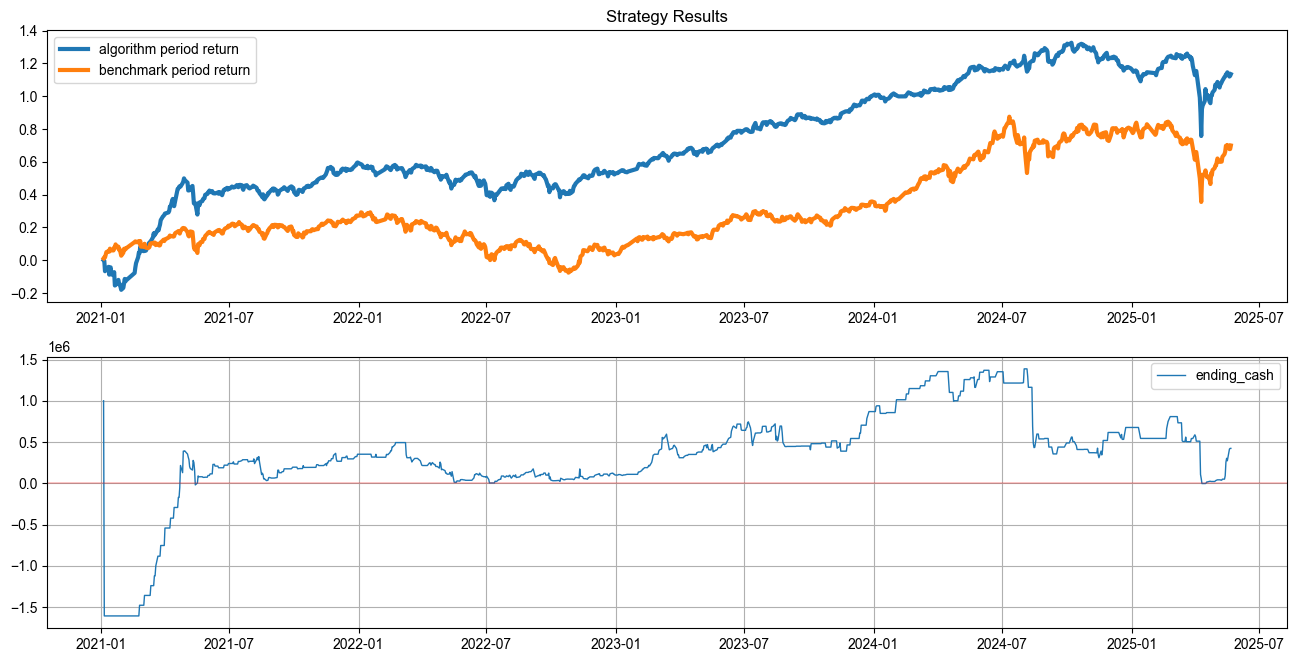

In [ ]:
from zipline import run_algorithm
from zipline.utils.calendar_utils import get_calendar
# Setup for running the algorithm
capital_base = 1e6
start = '2021-01-01'  # Example start date
end = '2025-05-21'  # Example end date

# Convert to pandas Timestamp
start_dt = pd.Timestamp(start, tz='UTC')
end_dt = pd.Timestamp(end, tz="UTC")

# Running the backtest
results = run_algorithm(start=start_dt,
                        end=end_dt,
                        initialize=initialize,
                        handle_data=handle_data,
                        capital_base=capital_base,
                        data_frequency='daily',
                        analyze=analyze,
                        bundle=bundle_name,  # Replace with your bundle name
                        trading_calendar=get_calendar('TEJ'),
                        custom_loader=loader_dict)

In [ ]:
from pyfolio.utils import extract_rets_pos_txn_from_zipline
import pyfolio as pf

# 從 results 資料表中取出 returns, positions & transactions
returns, positions, transactions = extract_rets_pos_txn_from_zipline(results)
benchmark_rets = results.benchmark_return  # 取出 benchmark 的報酬率

Start date,2021-01-04
End date,2025-05-21
Total months,50
,Backtest
Annual return,19.753%
Cumulative returns,113.451%
Annual volatility,16.952%
Sharpe ratio,1.15
Calmar ratio,0.81
Stability,0.84
Max drawdown,-24.449%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,24.45,2024-10-07,2025-04-09,NaT,NaN
1,18.04,2021-01-04,2021-01-29,2021-02-22,29
2,14.73,2021-04-28,2021-05-17,2021-11-08,134
3,14.44,2021-12-30,2022-07-12,2023-02-16,272
4,4.42,2024-08-30,2024-09-10,2024-09-27,20


Stress Events,mean,min,max
New Normal,0.08%,-8.77%,9.38%


Top 10 long positions of all time,max
sid,
2409,14.10%
2823,12.47%
8105,12.38%
5464,12.29%
4430,12.07%
2881,12.04%
3706,12.02%
4207,11.94%
3481,11.76%


Top 10 short positions of all time,max
sid,


Top 10 positions of all time,max
sid,
2409,14.10%
2823,12.47%
8105,12.38%
5464,12.29%
4430,12.07%
2881,12.04%
3706,12.02%
4207,11.94%
3481,11.76%


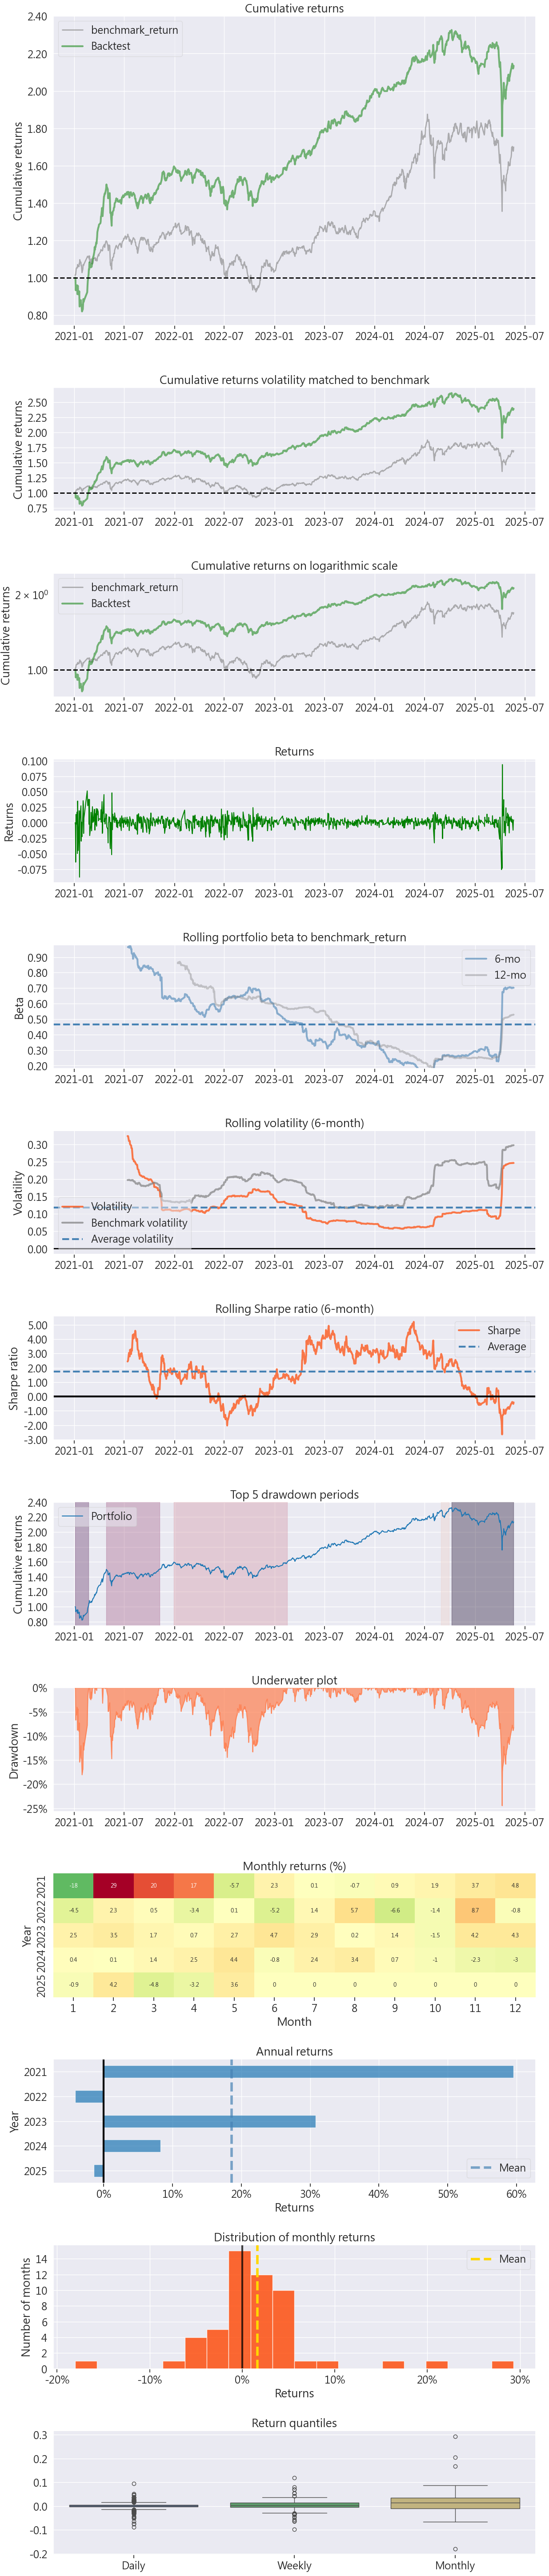

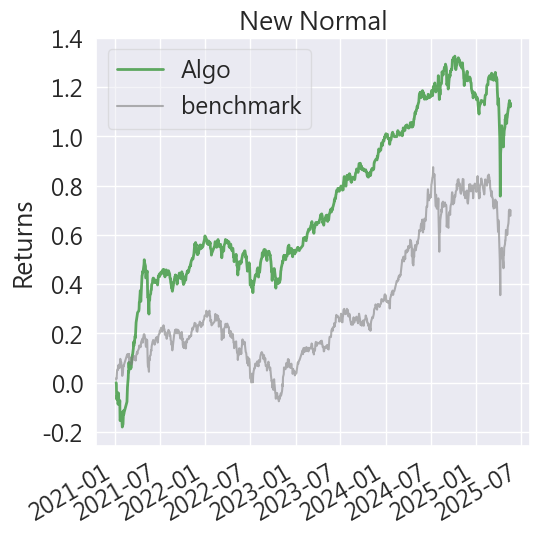

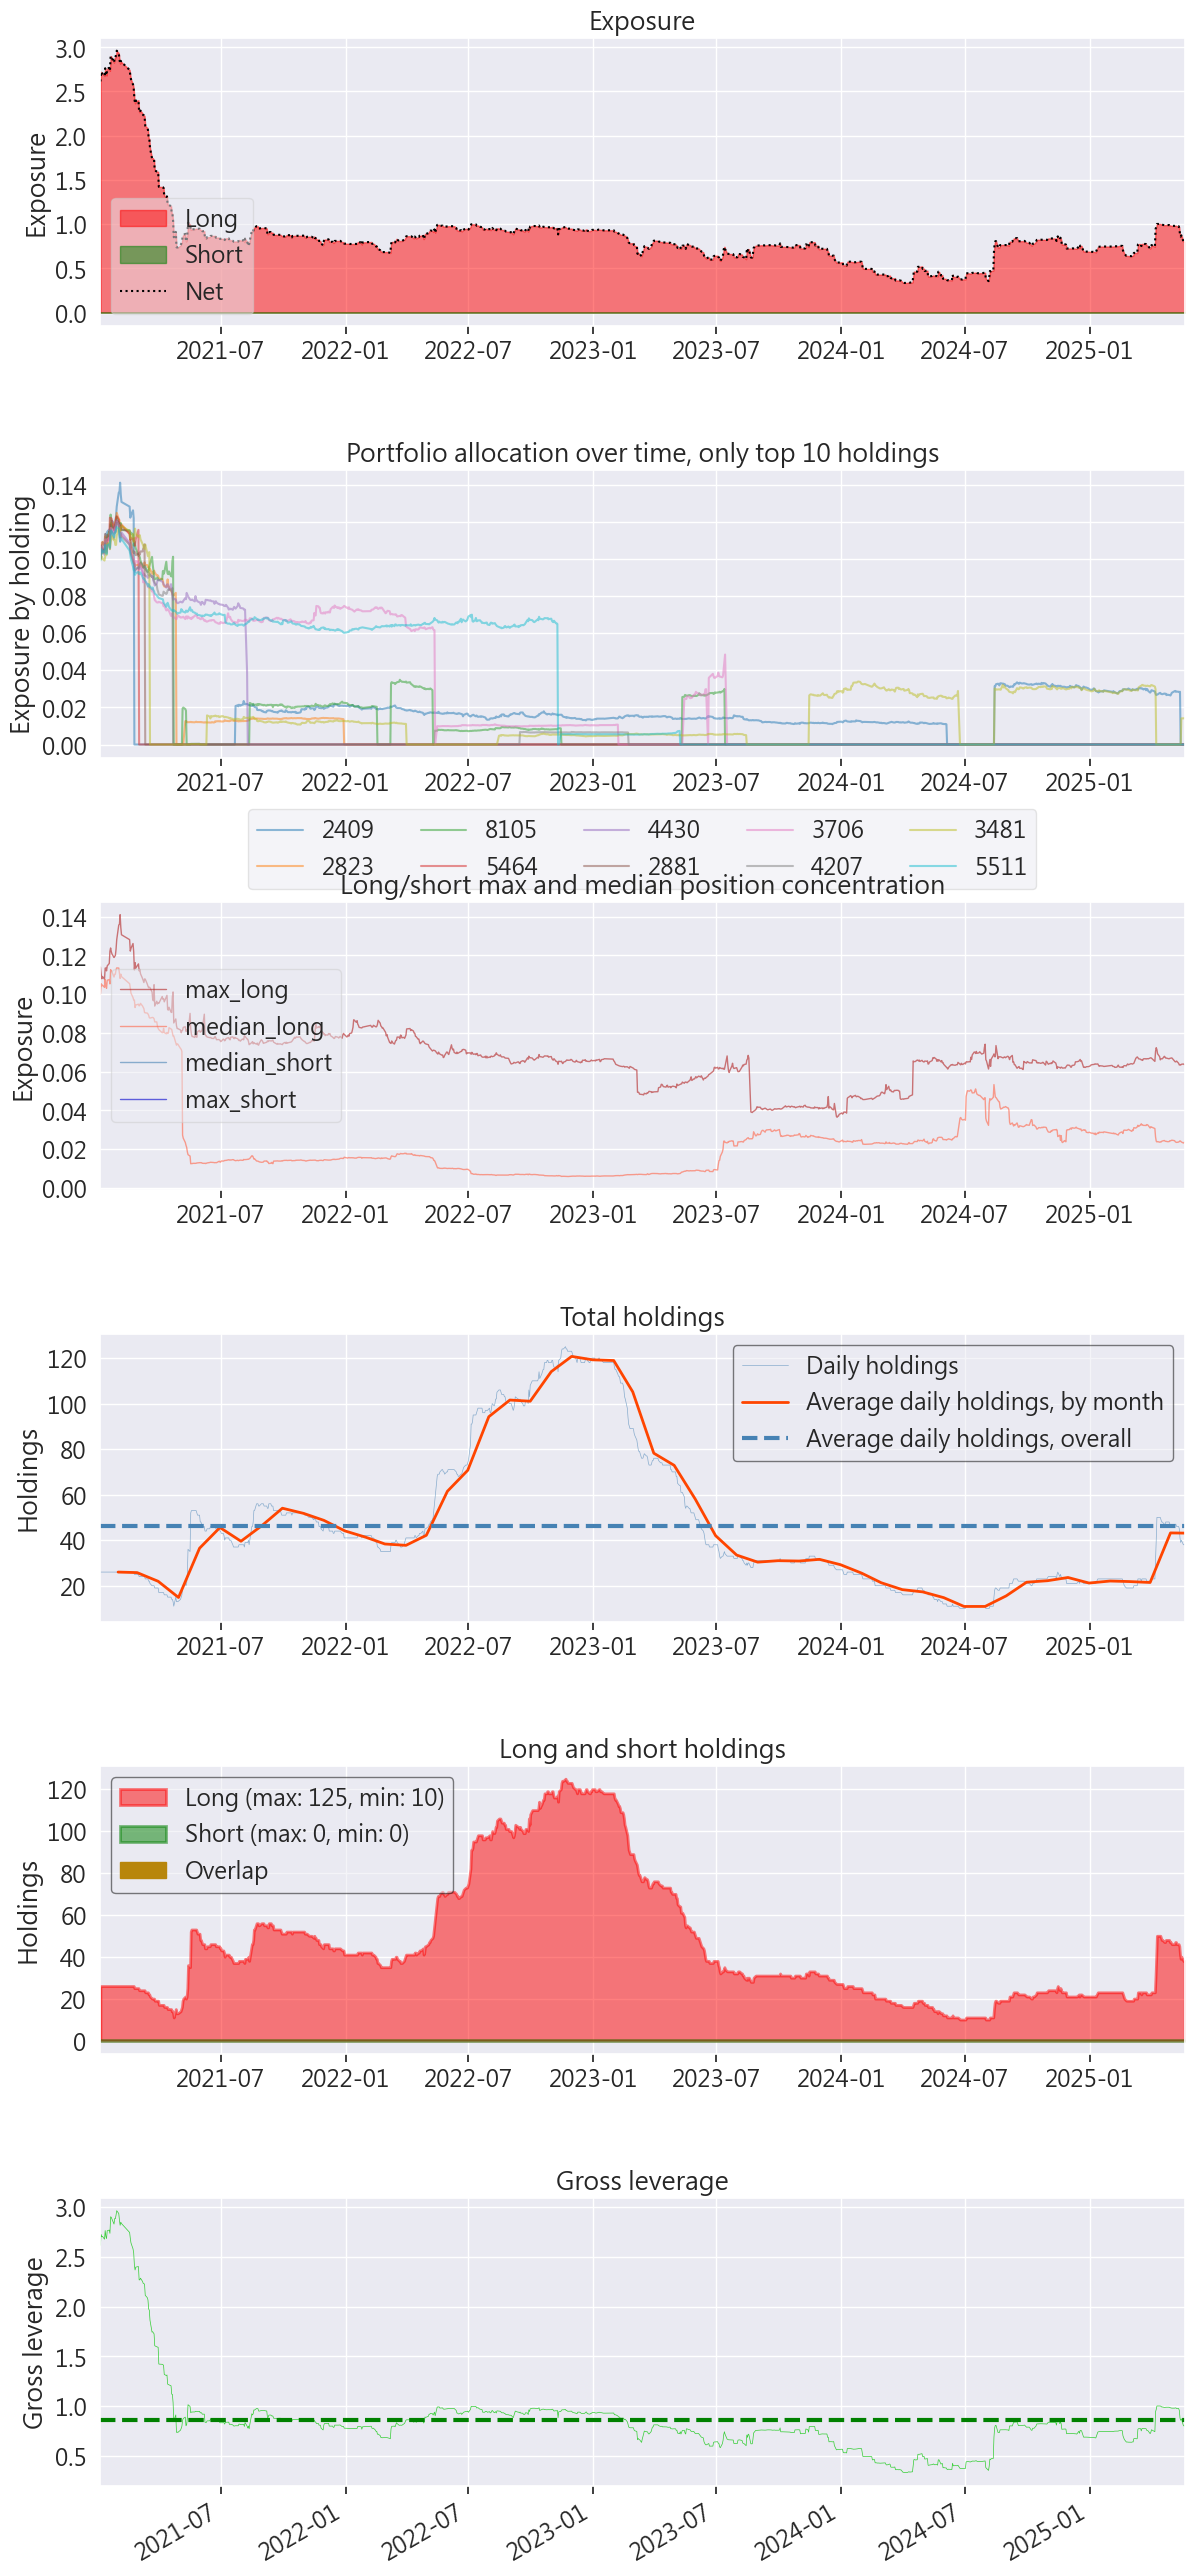

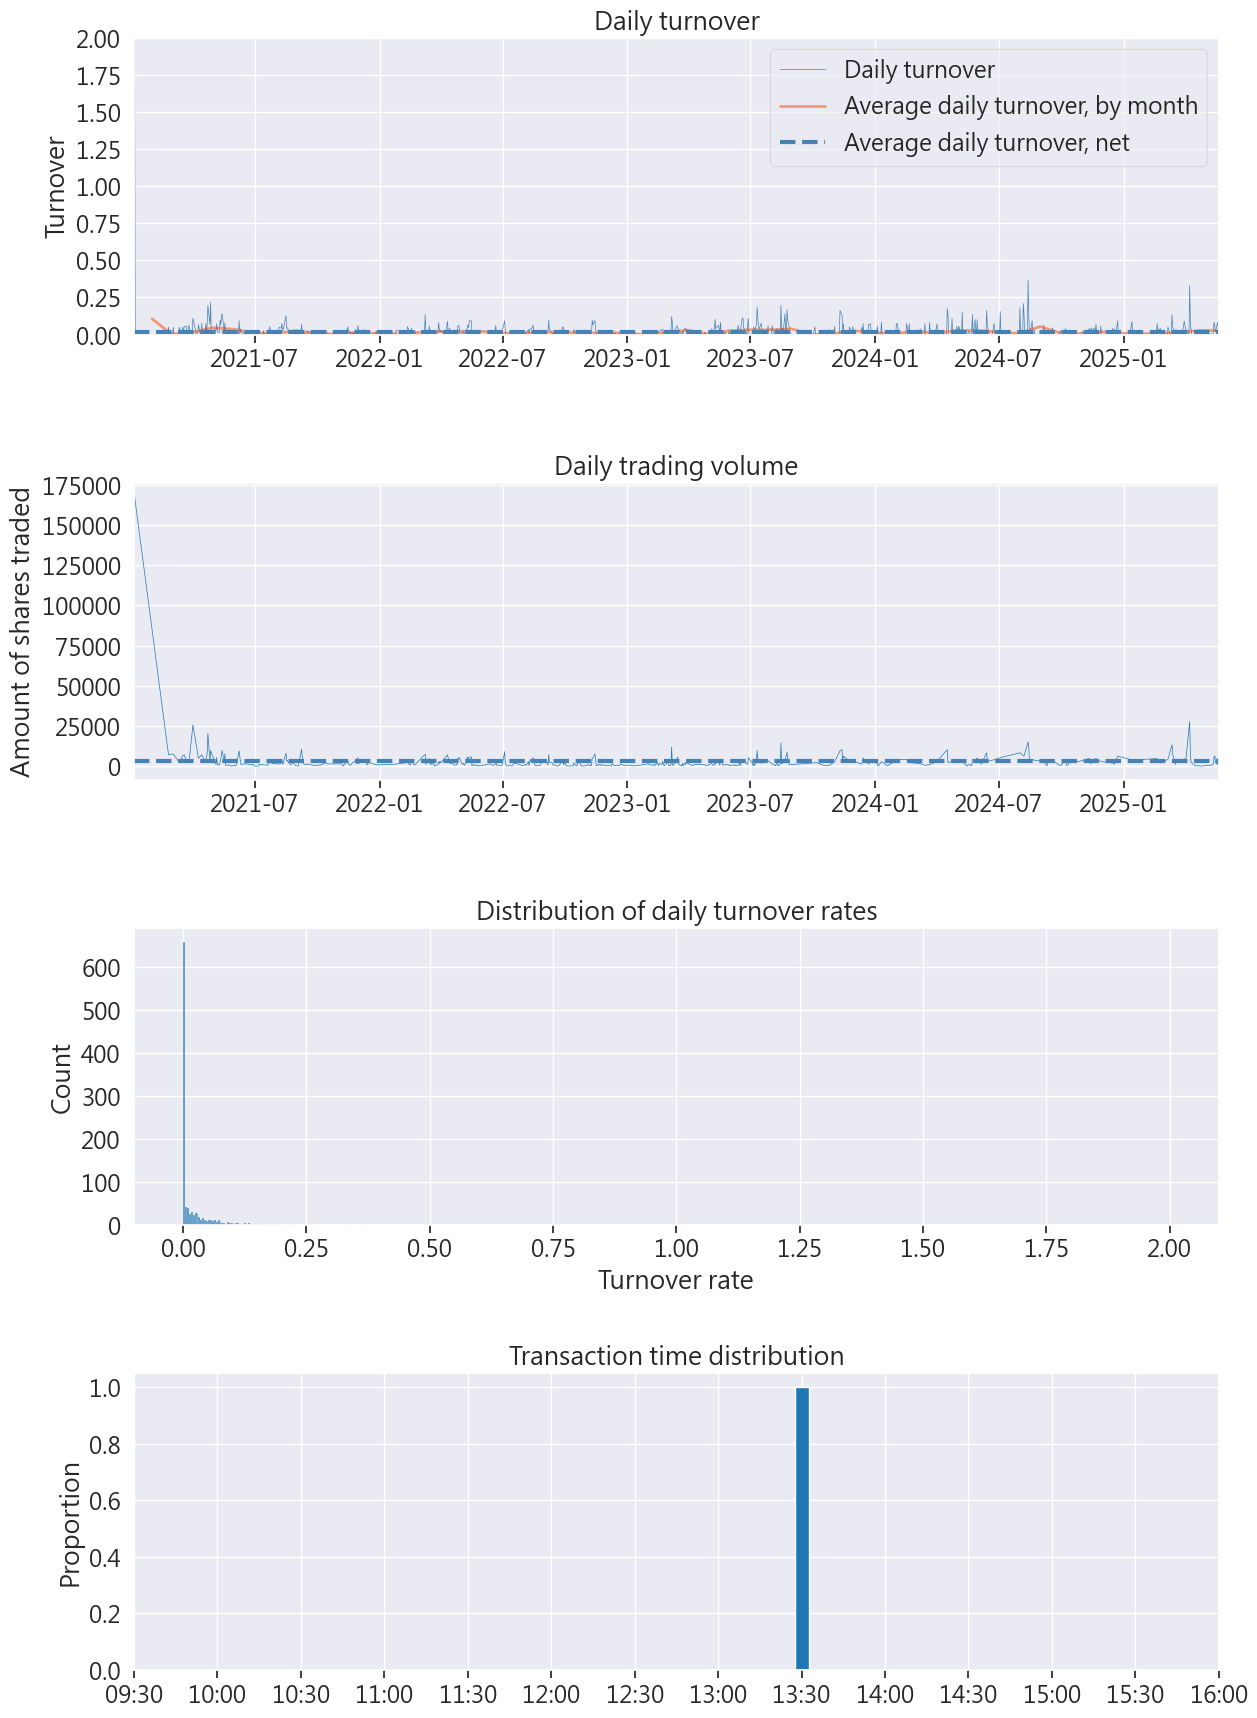

In [ ]:
# 繪製 Pyfolio 中提供的所有圖表
pf.tears.create_full_tear_sheet(returns=returns,
                                     positions=positions,
                                     transactions=transactions,
                                     benchmark_rets=benchmark_rets
                                    )